# **Analiza zmian klimatycznych metodami uczenia maszynowego**

// NAPISAĆ JAKIŚ WSTĘP

Import bibliotek:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from tabulate import tabulate


Ustawienie opcji, które wyświetlają wszystkie rekordy danych **(opcjonalnie)**.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Wyłączenie powyższych opcji umożliwia poniższy kod.

In [ ]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

## **Emisja CO2**


Pierwszym etapem niniejszej pracy jest przedstawienie danych w formie czytelnych wykresów odnośnie emisji CO2 w latach 1960 - 2019 dla całego świata i pojedyńczych państw, a także próba predykcji tych wartości dla lat późniejszych (2020 - 2100). Zostaną użyte i porównane różne algorytmy uczenia maszynowego takie jak:
- regresja liniowa
- regresja wielomianowa

a także metody statystyczne takie jak:
- autoregresja
- model ARIMA

Wyjaśnienie danych znajdujących się w pliku co2_emissions_kt_by_country.csv:

country_code: To kod kraju, który identyfikuje konkretny kraj.
country_name: To pełna nazwa kraju odpowiadająca kodowi kraju.
year: To rok, dla którego zgromadzono dane dotyczące emisji CO2.
value: To wartość emisji CO2 zgromadzona dla danego kraju i roku. Ta wartość wskazuje ilość CO2 emitowanego przez dany kraj w danym roku.

Wniosek z tych danych mógłby obejmować analizę trendów emisji CO2 w danym kraju lub regionie, porównanie poziomów emisji między różnymi krajami, zrozumienie wpływu polityk ekologicznych na poziomy emisji w poszczególnych krajach oraz prognozowanie przyszłych emisji CO2 na podstawie danych historycznych.

Wczytanie danych:

In [ ]:
data_CO2 = pd.read_csv('dane/co2_emissions_kt_by_country.csv')
print(data_CO2)

      country_code country_name  year    value
0              ABW        Aruba  1960 11092.67
1              ABW        Aruba  1961 11576.72
2              ABW        Aruba  1962 12713.49
3              ABW        Aruba  1963 12178.11
4              ABW        Aruba  1964 11840.74
...            ...          ...   ...      ...
13948          ZWE     Zimbabwe  2015 12430.00
13949          ZWE     Zimbabwe  2016 11020.00
13950          ZWE     Zimbabwe  2017 10340.00
13951          ZWE     Zimbabwe  2018 12380.00
13952          ZWE     Zimbabwe  2019 11760.00

[13953 rows x 4 columns]


Dane w tabeli reprezentują ilość CO2 wyemitowaną w danym roku dla różnych państw. Kolumna "value" zawiera ilość CO2 wyrażoną w kilotonach.

Łączna emisja CO2 wg. roku i kraju:

In [ ]:
world_data = data_CO2[data_CO2['country_name'] == 'World']
usa_data = data_CO2[data_CO2['country_name'] == 'United States']
european_data = data_CO2[data_CO2['country_name'] == 'European Union']
china_data = data_CO2[data_CO2['country_name'] == 'China']
india_data = data_CO2[data_CO2['country_name'] == 'India']
russia_data = data_CO2[data_CO2['country_name'] == 'Russian Federation']
poland_data = data_CO2[data_CO2['country_name'] == 'Poland']

world_co2_by_year = world_data.groupby('year')['value'].sum()
usa_co2_by_year = usa_data.groupby('year')['value'].sum()
european_co2_by_year = european_data.groupby('year')['value'].sum()
china_co2_by_year = china_data.groupby('year')['value'].sum()
india_co2_by_year = india_data.groupby('year')['value'].sum()
russia_co2_by_year = russia_data.groupby('year')['value'].sum()
poland_co2_by_year = poland_data.groupby('year')['value'].sum()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

total_co2_by_year = world_co2_by_year

total_co2_by_year.tail(10)

year
2010   31043476.98
2011   32021108.26
2012   32460316.86
2013   33119382.99
2014   33198729.82
2015   32995536.02
2016   33018556.40
2017   33514537.91
2018   34289350.66
2019   34344006.07
Name: value, dtype: float64

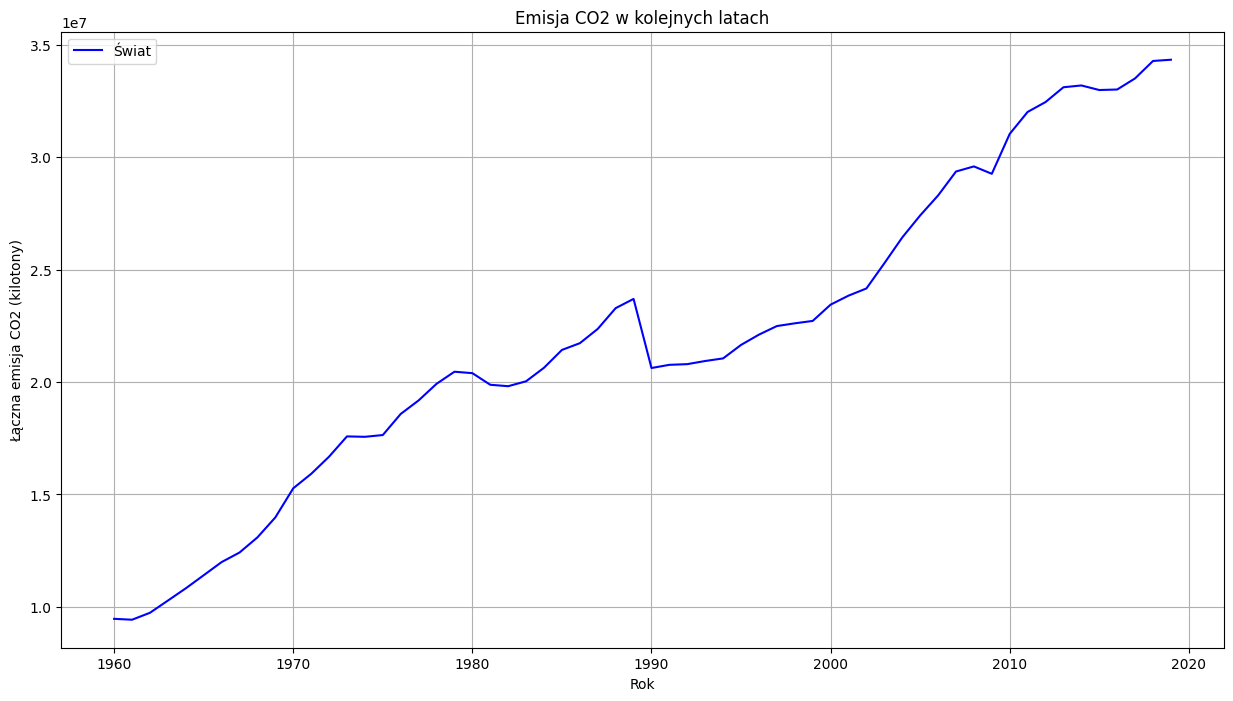

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(total_co2_by_year.index, total_co2_by_year.values, label='Świat', color='blue')


plt.title('Emisja CO2 w kolejnych latach')
plt.xlabel('Rok')
plt.ylabel('Łączna emisja CO2 (kilotony)')
plt.legend()
plt.grid(True)
plt.show()

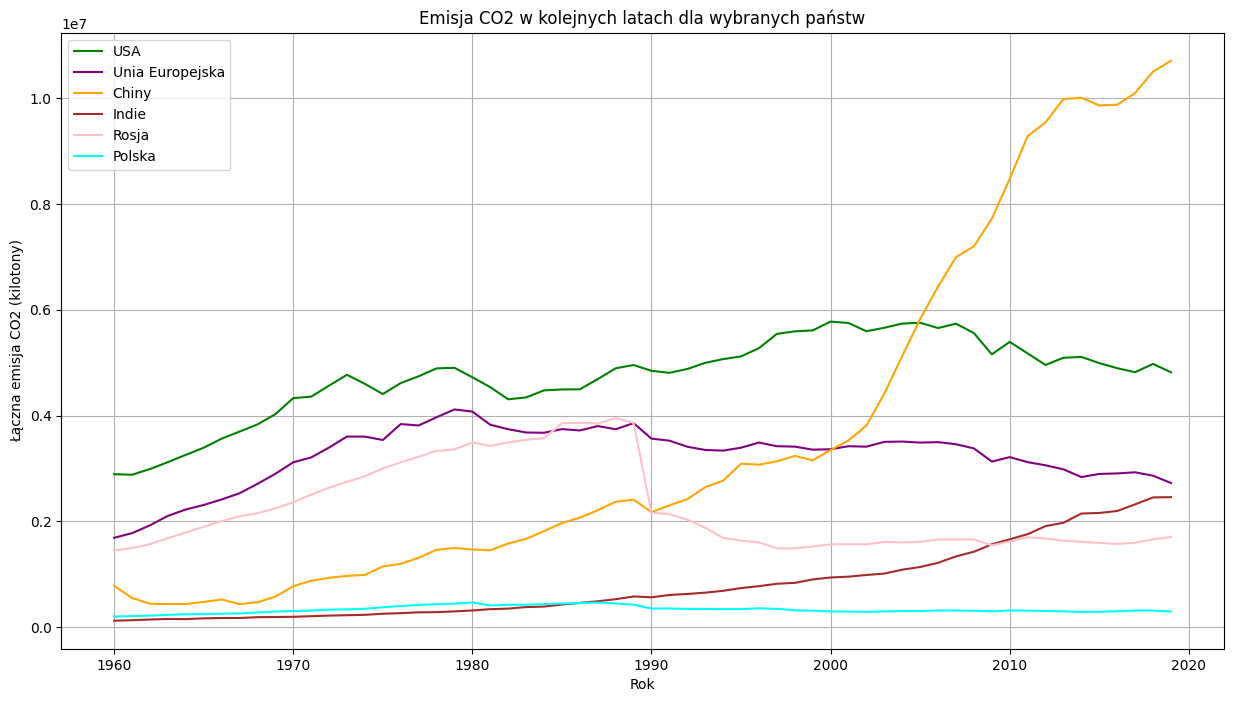

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(usa_co2_by_year.index, usa_co2_by_year.values, label='USA', color='green')
plt.plot(european_co2_by_year.index, european_co2_by_year.values, label='Unia Europejska', color='purple')
plt.plot(china_co2_by_year.index, china_co2_by_year.values, label='Chiny', color='orange')
plt.plot(india_co2_by_year.index, india_co2_by_year.values, label='Indie', color='brown')
plt.plot(russia_co2_by_year.index, russia_co2_by_year.values, label='Rosja', color='pink')
plt.plot(poland_co2_by_year.index, poland_co2_by_year.values, label='Polska', color='cyan')

plt.title('Emisja CO2 w kolejnych latach dla wybranych państw')
plt.xlabel('Rok')
plt.ylabel('Łączna emisja CO2 (kilotony)')
plt.legend()
plt.grid(True)
plt.show()

Próba predykcji emisji CO2 dla *całego świata* metodą **regresji liniowej**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


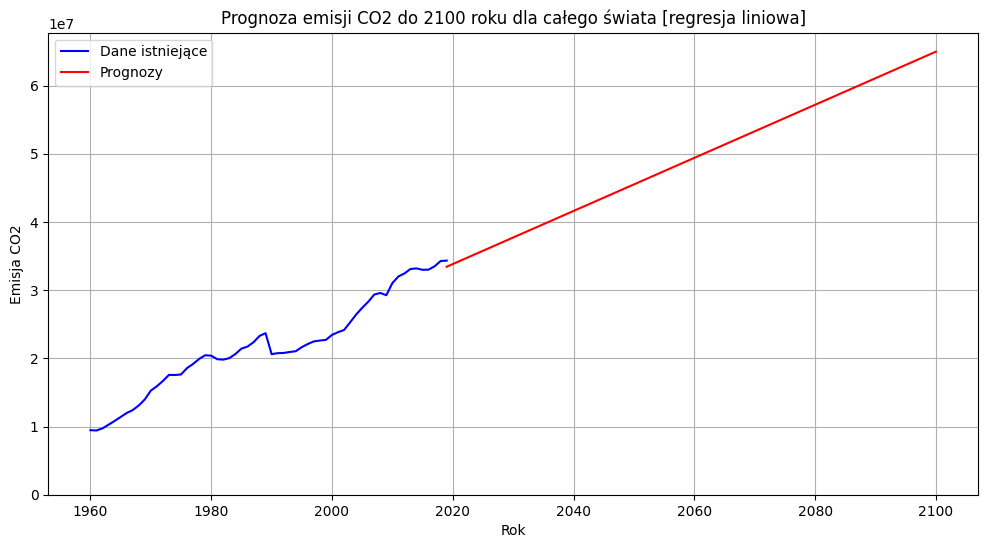

Metryka R2 dla danych trenowanych: 0.94


In [ ]:

X = world_data[['year']]
y = world_data['value']


model = LinearRegression()
model.fit(X, y)

r2_train = model.score(X, y)

future_years = [[year] for year in range(2019, 2101)]
future_predictions = model.predict(future_years)

plt.figure(figsize=(12, 6))
plt.plot(world_data['year'], world_data['value'], color='blue', label='Dane istniejące')
plt.plot(range(2019, 2101), future_predictions, color='red', label='Prognozy')

plt.title('Prognoza emisji CO2 do 2100 roku dla całego świata [regresja liniowa]')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.ylim(0, None)
plt.legend()
plt.grid(True)
plt.show()

print('Metryka R2 dla danych trenowanych:',round(r2_train,2))

Próba predykcji emisji CO2 dla *wybranego państwa* metodą **regresji liniowej**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


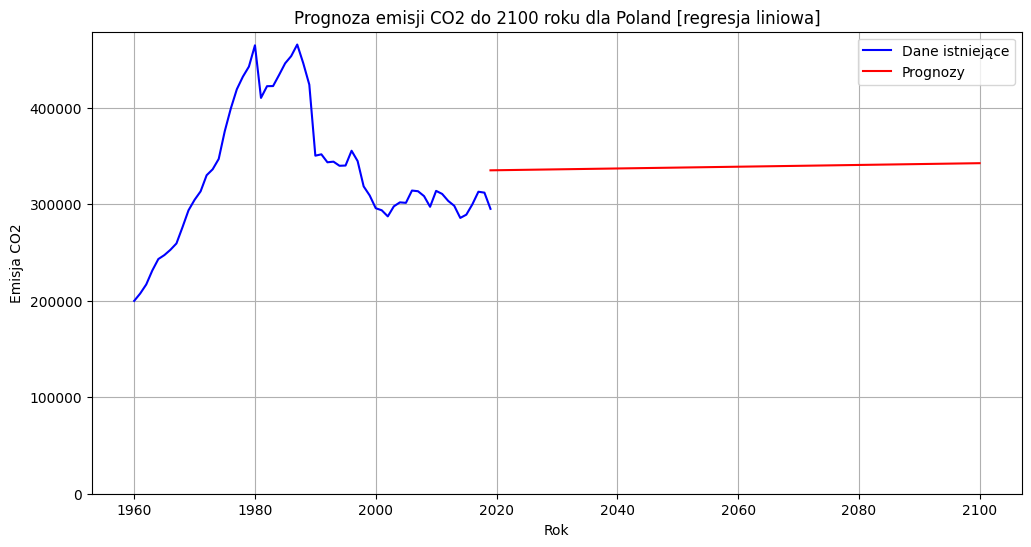

Metryka R2 dla danych trenowanych: 0.0


In [ ]:
try:
    panstwo = input("Podaj nazwę państwa dla którego ma być dokonana predykcja:")
    data_country = data_CO2[data_CO2['country_name'] == panstwo]

    X = data_country[['year']]
    y = data_country['value']


    model = LinearRegression()
    model.fit(X, y)

    r2_train = model.score(X, y)

    future_years = [[year] for year in range(2019, 2101)]
    future_predictions = model.predict(future_years)

    plt.figure(figsize=(12, 6))
    plt.plot(data_country['year'], data_country['value'], color='blue', label='Dane istniejące')
    plt.plot(range(2019, 2101), future_predictions, color='red', label='Prognozy')

    plt.title('Prognoza emisji CO2 do 2100 roku dla ' + panstwo + ' [regresja liniowa]')
    plt.xlabel('Rok')
    plt.ylabel('Emisja CO2')
    plt.ylim(0, None)
    plt.legend()
    plt.grid(True)
    plt.show()

    print('Metryka R2 dla danych trenowanych:',round(r2_train,2))
except:
    print("Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery")

Należy oczywiście wziąść pod uwagę, że regresja liniowa jest prostym modelem, który zakłada liniową zależność między zmiennymi. Jednak emisje CO2 mogą podlegać wpływowi wielu skomplikowanych czynników, takich jak technologiczny postęp, polityka rządowa i zmieniające się wzorce konsumpcji. Rządy prawdopodobnie będą kontynuować wysiłki w kierunku ograniczenia emisji CO2, co może wpłynąć na przyszłe trendy. Dlatego aby tego typu prognozy były jak najbardziej rzetelne powinno się monitorować i brać pod uwagę inne czynniki, by prognozy te były jak najbardziej rzetelne.

Próba predykcji emisji CO2 dla *całego świata* metodą **regresji wielomianowej**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


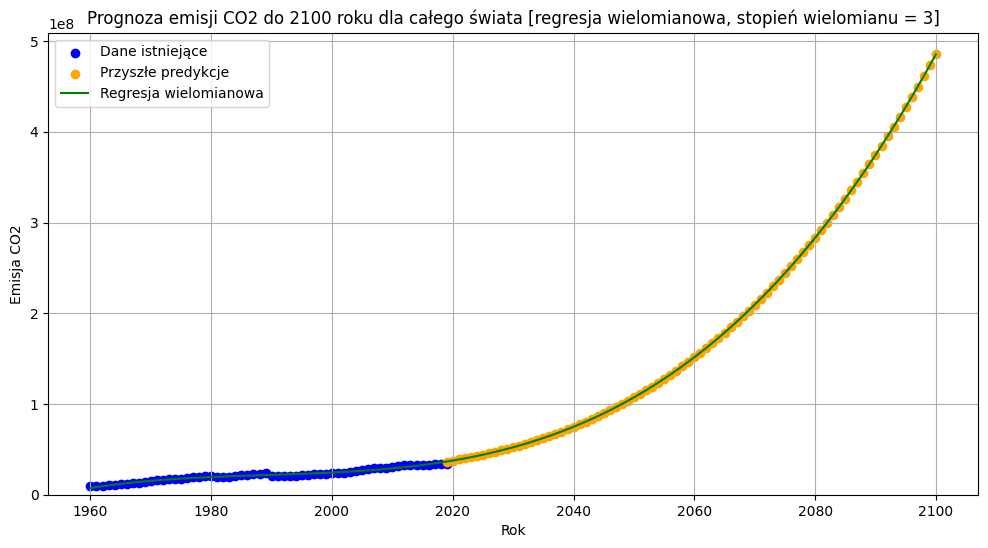

Metryka R2 dla trenowanych danych: 0.97


In [ ]:
X = world_data[['year']]
y = world_data['value'].values


poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)

future_years = [[year] for year in range(2019, 2101)]
future_years_poly = poly_features.transform(future_years)
future_emission = model.predict(future_years_poly)

X_range = np.concatenate((X, future_years), axis=0)
X_range_poly = poly_features.transform(X_range)


plt.figure(figsize=(12, 6))
plt.title('Prognoza emisji CO2 do 2100 roku dla całego świata [regresja wielomianowa, stopień wielomianu = 3]')
plt.scatter(X, y, color='blue', label='Dane istniejące')
plt.scatter(future_years, future_emission, color='orange', label='Przyszłe predykcje')  
plt.plot(X_range, model.predict(X_range_poly), color='green', label='Regresja wielomianowa')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.ylim(0, None)
plt.grid(True)
plt.legend()
plt.show()

print(f"Metryka R2 dla trenowanych danych: {round(r2_train,2)}")


C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


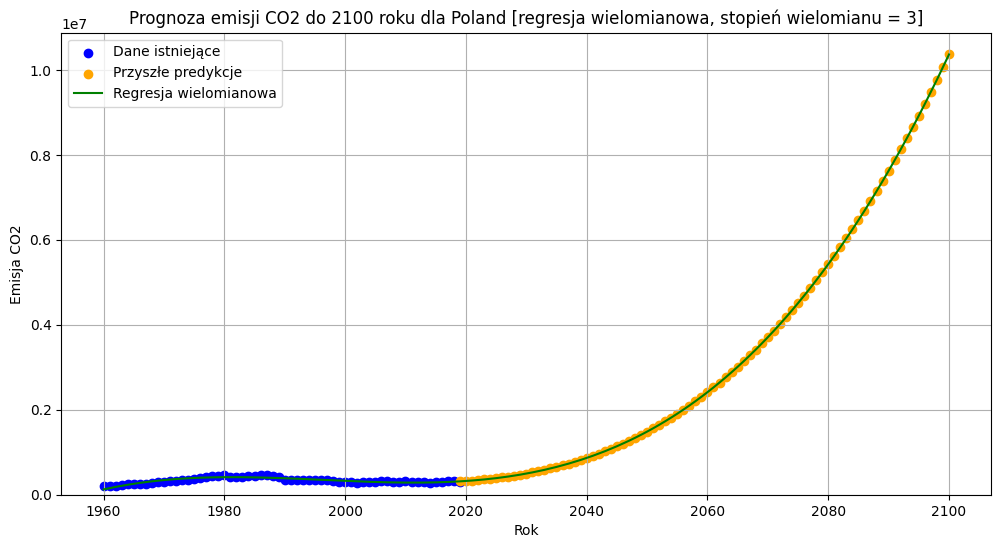

Metryka R2 dla trenowanych danych: 0.82


In [ ]:
try:
    panstwo = input("Podaj nazwę państwa dla którego ma być dokonana predykcja:")
    degree = int(input("Podaj stopień wielomianu"))
    data_country = data_CO2[data_CO2['country_name'] == panstwo]

    X = data_country[['year']]
    y = data_country['value'].values

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)

    r2_train = r2_score(y_train, y_pred_train)

    future_years = [[year] for year in range(2019, 2101)]
    future_years_poly = poly_features.transform(future_years)
    future_emission = model.predict(future_years_poly)

    X_range = np.concatenate((X, future_years), axis=0)
    X_range_poly = poly_features.transform(X_range)

    plt.figure(figsize=(12, 6))
    plt.title('Prognoza emisji CO2 do 2100 roku dla '+ panstwo + ' [regresja wielomianowa, stopień wielomianu = '+ str(degree) + ']')
    plt.scatter(X, y, color='blue', label='Dane istniejące')
    plt.scatter(future_years, future_emission, color='orange', label='Przyszłe predykcje')  
    plt.plot(X_range, model.predict(X_range_poly), color='green', label='Regresja wielomianowa')
    plt.xlabel('Rok')
    plt.ylabel('Emisja CO2')
    plt.ylim(0, None)
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Metryka R2 dla trenowanych danych: {round(r2_train,2)}")
except:
    print("Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery")

Dane z regresji liniowej przewidują bardziej optymystyczny scenariusz w którym to do roku 2100 przewidywana emisja dla całego świata będzie cały rząd wielkości mniejsza, niż za pomocą regresji wielomianowej. Różnice między przewidywaniami regresji liniowej, a wielomianowej mogą wynikać z ograniczeń liniowego modelu, który zakłada stałą, jednostajną zmianę na przestrzeni lat. W przypadku zjawisk złożonych, takich jak emisja CO2, regresja wielomianowa jest bardziej elastyczna i może lepiej odzwierciedlać nieliniowe wzorce, co czasami prowadzi do bardziej realistycznych prognoz. Jednak i tak należy wziąść pod uwagę, iż modele te operują tylko na dostarczonych danych liczbowych, nie są więc w stanie wziąść pod uwagę wysiłku rządów w celu ograniczania tejże emisji.

Próba predykcji emisji CO2 dla całego świata za pomocą **autoregresji**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


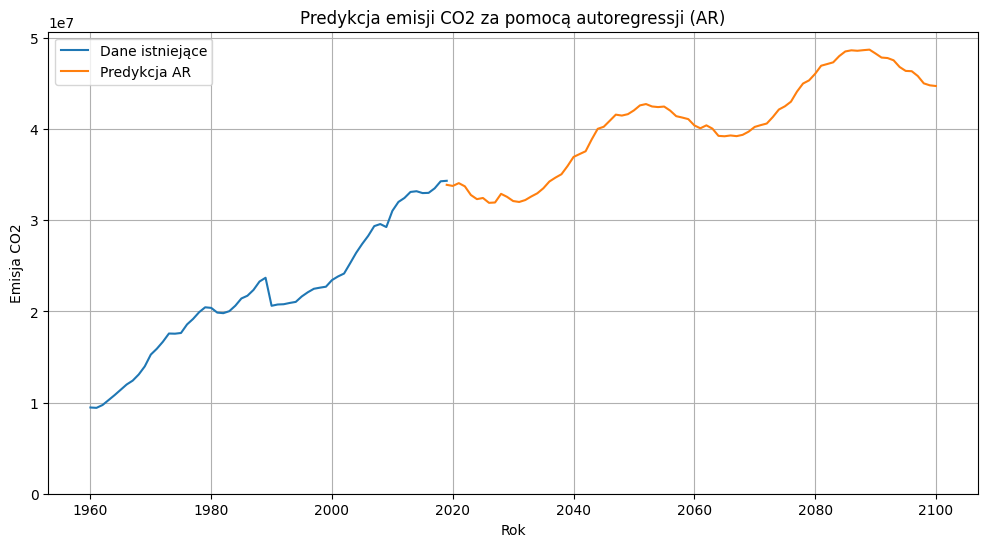

In [ ]:
X = world_data['year']
y = world_data['value']

model = AutoReg(y, lags=22)  # parametr lags - liczba opóźnień, określa, o ile kroków wstecz w historii danych model będzie sięgał, aby przewidzieć aktualną wartość ,zbyt duza - nadmierne dopasowanie, zbyt mala - zbyt prosty model
model_fit = model.fit()


future_years = np.arange(2019, 2101)
future_emission = model_fit.predict(start=len(y), end=len(y)+len(future_years)-1)

plt.figure(figsize=(12, 6))
plt.plot(X, y, '-', label='Dane istniejące')
plt.plot(future_years, future_emission, '-', label='Predykcja AR')
plt.title('Predykcja emisji CO2 za pomocą autoregressji (AR)')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.ylim(0, None)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


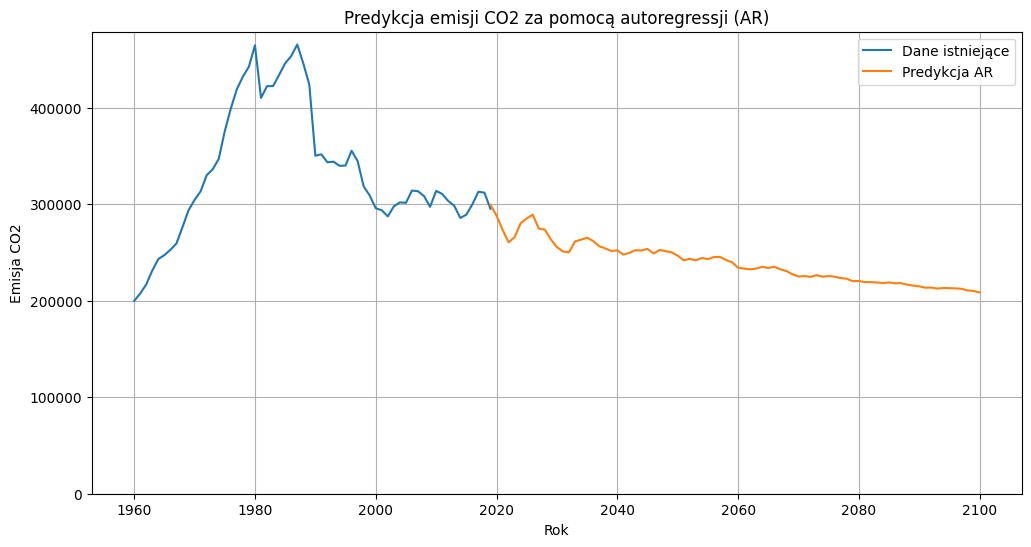

In [ ]:
try:
    panstwo = input("Podaj nazwę państwa dla którego ma być dokonana predykcja:")
    lags = int(input("Podaj liczbę opóźnień"))

    data_country = data_CO2[data_CO2['country_name'] == panstwo]

    X = data_country['year']
    y = data_country['value']

    model = AutoReg(y, lags=lags)  # parametr lags - liczba opóźnień, określa, o ile kroków wstecz w historii danych model będzie sięgał, aby przewidzieć aktualną wartość ,zbyt duza - nadmierne dopasowanie, zbyt mala - zbyt prosty model
    model_fit = model.fit()


    future_years = np.arange(2019, 2101)
    future_emission = model_fit.predict(start=len(y), end=len(y)+len(future_years)-1)

    plt.figure(figsize=(12, 6))
    plt.plot(X, y, '-', label='Dane istniejące')
    plt.plot(future_years, future_emission, '-', label='Predykcja AR')
    plt.title('Predykcja emisji CO2 za pomocą autoregressji (AR)')
    plt.xlabel('Rok')
    plt.ylabel('Emisja CO2')
    plt.ylim(0, None)
    plt.legend()
    plt.grid(True)
    plt.show()
except:
    print("Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery")

Próba predykcji emisji CO2 dla całego świata za pomocą **modelu ARIMA**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

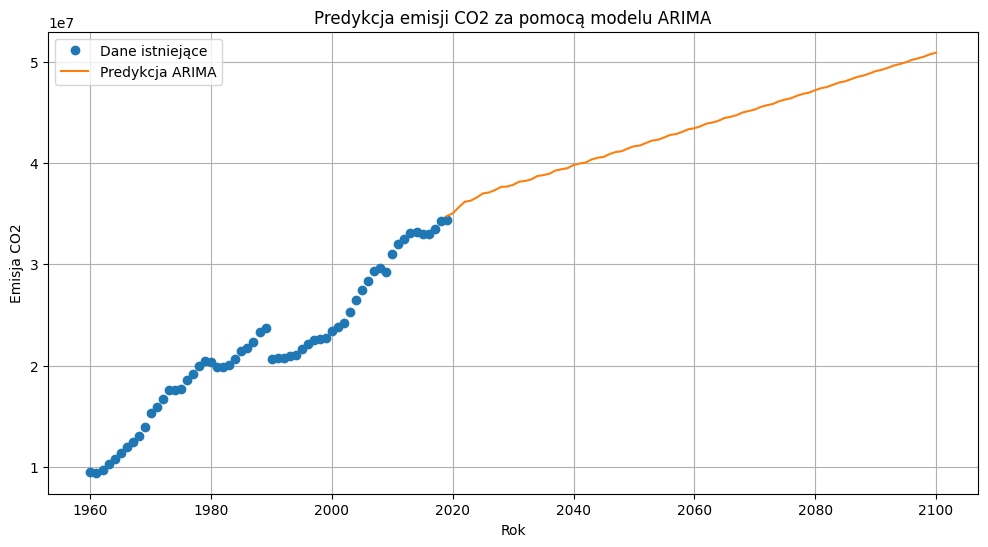

In [ ]:


X = world_data[['year']]
y = world_data['value']


model = ARIMA(y, order=(4,2,10))  ########################## parametry p,d i q - ZORIENTOWAĆ SIĘ JAK JE SIĘ DOBIERA ######################################
model_fit = model.fit()

future_years = np.arange(2019, 2101)
future_emission = model_fit.forecast(steps=len(future_years))

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'o', label='Dane istniejące')
plt.plot(future_years, future_emission, '-', label='Predykcja ARIMA')
plt.title('Predykcja emisji CO2 za pomocą modelu ARIMA')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.legend()
plt.grid(True)
plt.show()




// DOKOŃCYĆ ARIMA


## **Globalny poziom morza**

Następny zestaw danych do analizy dotyczy pomiarów poziomu morza w latach 1993 - 2021. 

Plik sealevel.csv zawiera następujące cechy:

Year: Rok pomiaru. 

TotalWeightedObservations: Suma obserwacji ważonych.

GMSL_noGIA: Globalny poziom morza (Global Mean Sea Level) bez korekty związanej z działalnością lądolodów (Glacial Isostatic Adjustment - GIA). Jest to średnia wysokość poziomu morza w [mm] na całym świecie w stosunku do określonego odniesienia, nie uwzględniając wpływu zmian masy lądolodów.

StdDevGMSL_noGIA: Odchylenie standardowe globalnego poziomu morza bez korekty GIA. Wskazuje ono na zmienność w wysokości poziomu morza w ciągu danego roku.

SmoothedGSML_noGIA: Wygładzony globalny poziom morza bez korekty GIA. 

GMSL_GIA: Globalny poziom morza z uwzględnieniem korekty GIA. Korekta GIA uwzględnia wpływ zmian masy lądolodów na wysokość poziomu morza.

StdDevGMSL_GIA: Odchylenie standardowe globalnego poziomu morza z uwzględnieniem korekty GIA.

SmoothedGSML_GIA: Wygładzony globalny poziom morza z uwzględnieniem korekty GIA.

SmoothedGSML_GIA_sigremoved: Wygładzony globalny poziom morza z uwzględnieniem korekty GIA, z usuniętymi sygnałami, które nie są istotne z punktu widzenia analizy lub nieodpowiednio wyznaczonymi.


Wczytanie danych:

In [ ]:
data_sealevel = pd.read_csv('dane/sealevel.csv')
data_sealevel.head(10)

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
5,1993,291945.91,-36.09,89.99,-37.71,-36.05,89.99,-37.67,-35.98
6,1993,327830.00,-36.11,88.74,-36.85,-36.06,88.74,-36.81,-34.94
7,1993,326320.41,-35.52,89.49,-36.32,-35.47,89.49,-36.27,-34.19
8,1993,322331.00,-35.47,88.79,-36.11,-35.41,88.78,-36.05,-33.72
9,1993,331127.31,-39.25,98.10,-36.17,-39.19,98.09,-36.11,-33.48


Liczba obserwacji w danym roku

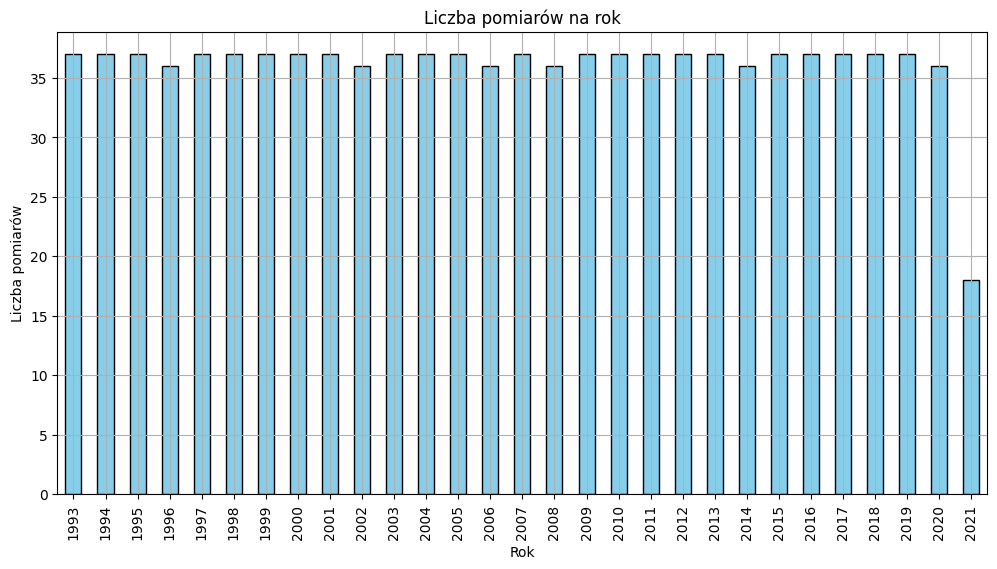

In [ ]:
plt.figure(figsize=(12, 6))
data_sealevel.Year.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Liczba pomiarów na rok')
plt.xlabel('Rok')
plt.ylabel('Liczba pomiarów')
plt.grid(True)
plt.show()


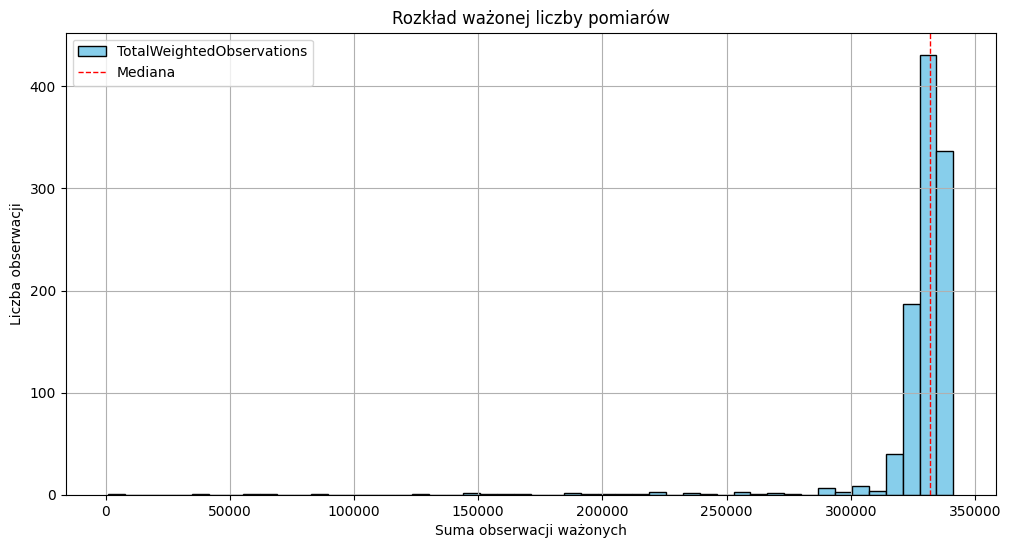

In [ ]:
plt.figure(figsize=(12, 6))
data_sealevel.TotalWeightedObservations.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.axvline(data_sealevel.TotalWeightedObservations.median(), color='red', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Rozkład ważonej liczby pomiarów')
plt.xlabel('Suma obserwacji ważonych')
plt.ylabel('Liczba obserwacji')
plt.legend()
plt.grid(True)
plt.show()

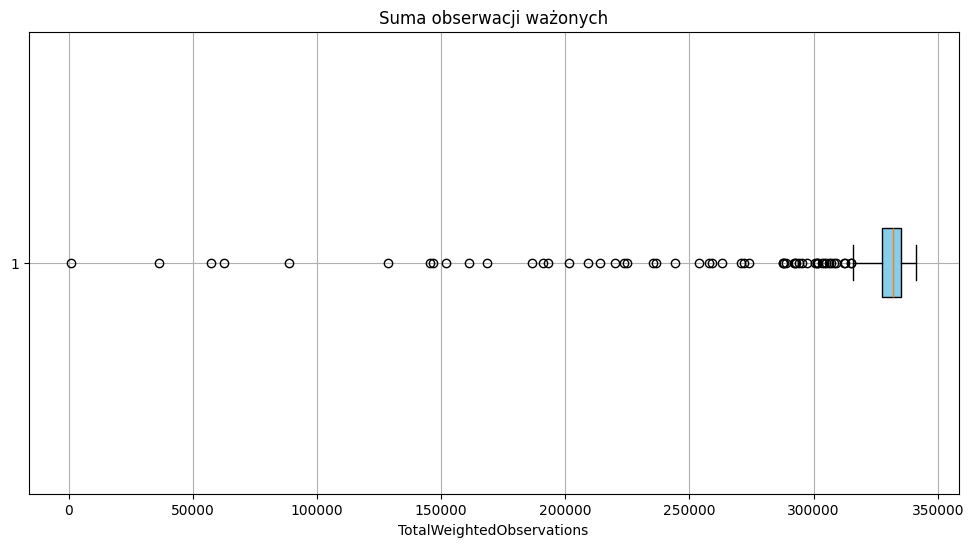

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(data_sealevel.TotalWeightedObservations, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Suma obserwacji ważonych')
plt.xlabel('TotalWeightedObservations')
plt.grid(True)
plt.show()


Usunięcie obserwacji odstającej

In [ ]:
data_sealevel[data_sealevel.TotalWeightedObservations<25000]

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
107,1995,906.10,-44.39,77.41,-25.34,-43.14,77.42,-24.63,-26.87


In [ ]:
data_sealevel = data_sealevel[data_sealevel.TotalWeightedObservations>25000]

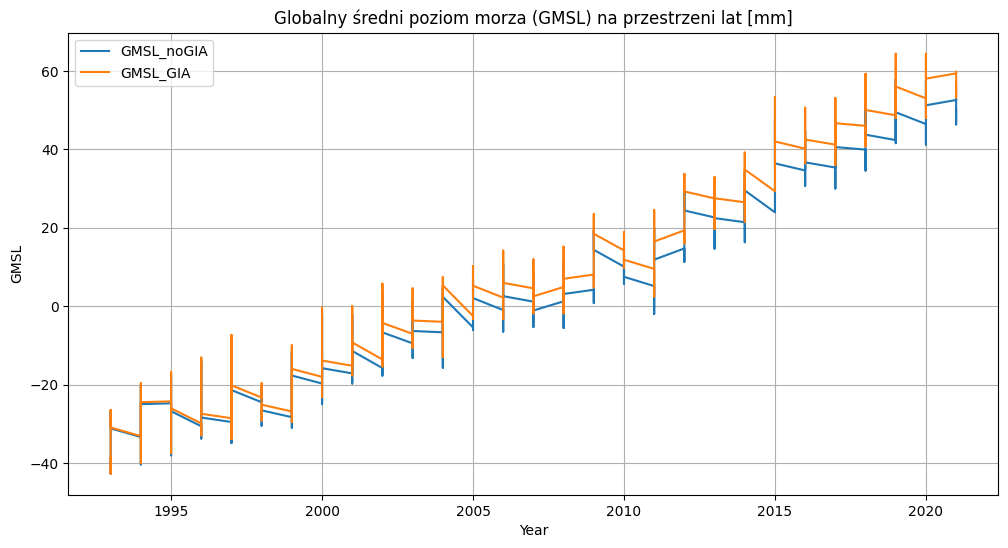

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_sealevel['Year'], data_sealevel['GMSL_noGIA'], label='GMSL_noGIA')
plt.plot(data_sealevel['Year'], data_sealevel['GMSL_GIA'], label='GMSL_GIA')
plt.xlabel('Year')
plt.ylabel('GMSL')
plt.title('Globalny średni poziom morza (GMSL) na przestrzeni lat [mm]')
plt.legend()
plt.grid(True)
plt.show()

Statystyki opisowe

In [ ]:
print("\nStatystyki opisowe dla kolumny GMSL_noGIA:")
print(data_sealevel['GMSL_noGIA'].describe())

print("\nStatystyki opisowe dla kolumny GMSL_GIA:")
print(data_sealevel['GMSL_GIA'].describe())


Statystyki opisowe dla kolumny GMSL_noGIA:
count   1047.00
mean       4.69
std       26.32
min      -42.67
25%      -18.21
50%        1.94
75%       25.87
max       57.92
Name: GMSL_noGIA, dtype: float64

Statystyki opisowe dla kolumny GMSL_GIA:
count   1047.00
mean       8.16
std       28.28
min      -42.65
25%      -16.61
50%        5.55
75%       30.95
max       64.39
Name: GMSL_GIA, dtype: float64


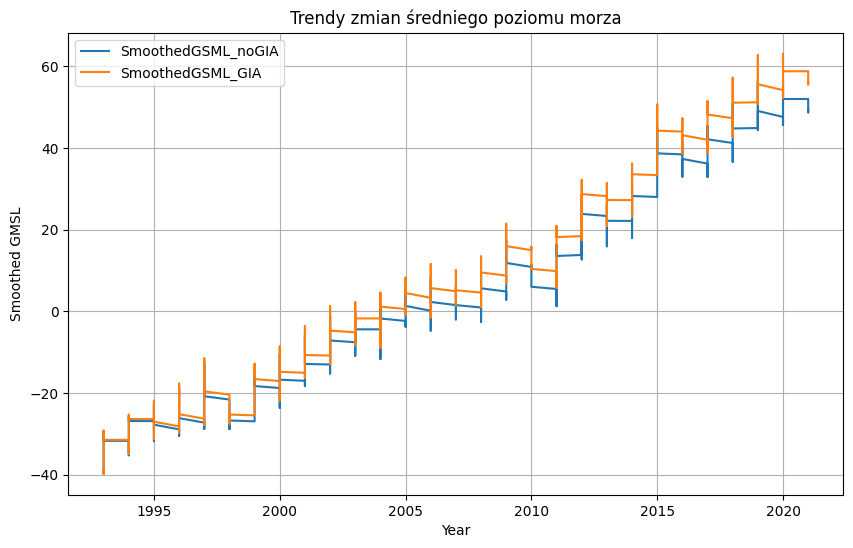

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_sealevel['Year'], data_sealevel['SmoothedGSML_noGIA'], label='SmoothedGSML_noGIA')
plt.plot(data_sealevel['Year'], data_sealevel['SmoothedGSML_GIA'], label='SmoothedGSML_GIA')
plt.xlabel('Year')
plt.ylabel('Smoothed GMSL')
plt.title('Trendy zmian średniego poziomu morza')
plt.legend()
plt.grid(True)
plt.show()

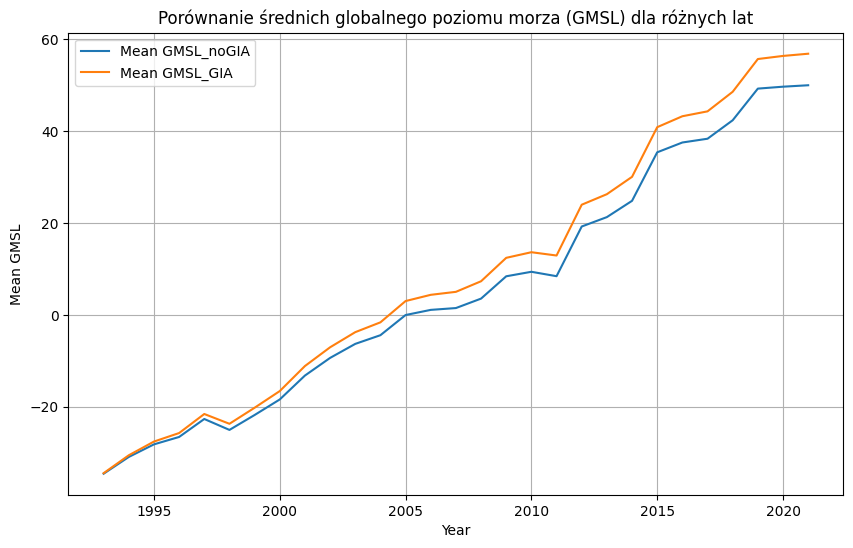

In [ ]:
mean_gmsl_noGIA = data_sealevel.groupby('Year')['GMSL_noGIA'].mean()
mean_gmsl_GIA = data_sealevel.groupby('Year')['GMSL_GIA'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_gmsl_noGIA.index, mean_gmsl_noGIA.values, label='Mean GMSL_noGIA')
plt.plot(mean_gmsl_GIA.index, mean_gmsl_GIA.values, label='Mean GMSL_GIA')
plt.xlabel('Year')
plt.ylabel('Mean GMSL')
plt.title('Porównanie średnich globalnego poziomu morza (GMSL) dla różnych lat')
plt.legend()
plt.grid(True)
plt.show()

R2 dla regresji liniowej: 0.9478215456552407
R2 dla regresji wielomianowej: 0.9573563573935061


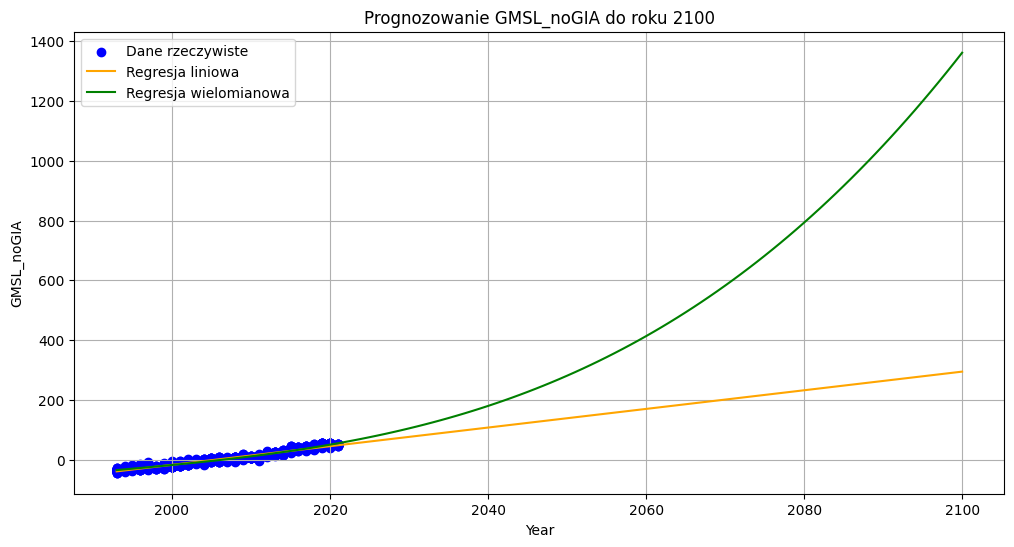

In [ ]:
lin_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=3) 
poly_reg = LinearRegression()

lin_reg.fit(data_sealevel['Year'].values.reshape(-1, 1), data_sealevel['GMSL_noGIA'])

X_poly = poly_features.fit_transform(data_sealevel['Year'].values.reshape(-1, 1))
poly_reg.fit(X_poly, data_sealevel['GMSL_noGIA'])

X_future = np.arange(1993, 2101).reshape(-1, 1)

lin_pred_future = lin_reg.predict(X_future)

X_poly_future = poly_features.transform(X_future)
poly_pred_future = poly_reg.predict(X_poly_future)

plt.figure(figsize=(12, 6))

plt.scatter(data_sealevel['Year'], data_sealevel['GMSL_noGIA'], label='Dane rzeczywiste', color='blue')

plt.plot(X_future, lin_pred_future, label='Regresja liniowa', color='orange')
plt.plot(X_future, poly_pred_future, label='Regresja wielomianowa', color='green')

plt.xlabel('Year')
plt.ylabel('GMSL_noGIA')
plt.title('Prognozowanie GMSL_noGIA do roku 2100')
plt.legend()
plt.grid(True)

r2_lin = r2_score(data_sealevel['GMSL_noGIA'], lin_reg.predict(data_sealevel['Year'].values.reshape(-1, 1)))
r2_poly = r2_score(data_sealevel['GMSL_noGIA'], poly_reg.predict(poly_features.transform(data_sealevel['Year'].values.reshape(-1, 1))))

print(f'R2 dla regresji liniowej: {r2_lin}')
print(f'R2 dla regresji wielomianowej: {r2_poly}')


plt.show()

//DODAĆ OPIS

## **Średnia temperatura w poszczególnych państwach w latach 1743 - 2013**

// OPIS DANYCH

Wczytanie danych:

In [ ]:
data_temperature = pd.read_csv('dane/GlobalLandTemperaturesByCountry.csv')
print(data_temperature.head(10))



           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01                4.38                           2.29   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01                1.53                           4.68   Åland
6  1744-05-01                6.70                           1.79   Åland
7  1744-06-01               11.61                           1.58   Åland
8  1744-07-01               15.34                           1.41   Åland
9  1744-08-01                 NaN                            NaN   Åland


Mamy dużą liczbę wartości pustych zwłaszcza w danych z XVIII i XIX w. można więc usunąć wartości puste.

In [ ]:
data_temperature = data_temperature.dropna()
print(data_temperature.head(10))

            dt  AverageTemperature  AverageTemperatureUncertainty Country
0   1743-11-01                4.38                           2.29   Åland
5   1744-04-01                1.53                           4.68   Åland
6   1744-05-01                6.70                           1.79   Åland
7   1744-06-01               11.61                           1.58   Åland
8   1744-07-01               15.34                           1.41   Åland
10  1744-09-01               11.70                           1.52   Åland
11  1744-10-01                5.48                           1.86   Åland
12  1744-11-01                3.41                           1.43   Åland
13  1744-12-01               -2.18                           1.64   Åland
14  1745-01-01               -3.85                           1.84   Åland


Można by wybrać Państwo i miesiąc dla którego przeprowadzano pomiary, następnie zwizualizować dane.
Poniższe trzy wykresy przedstawiają średnią temperature dla danego państwa, a także niepewności pomiarowe i regresje liniową, która rezprezentuje linie trendu.
Ponadto na ostatnim wykresie znajduje się sama linia trendu (wielominan drugiego stopnia).

C:\Users\kubar\AppData\Local\Temp\ipykernel_3032\471621561.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_temperature['dt'] = pd.to_datetime(country_temperature['dt'])
C:\Users\kubar\AppData\Local\Temp\ipykernel_3032\471621561.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_temperature['Year'] = country_temperature['dt'].dt.year


    Rok  Przewidywana temperatura (°C)
0  1850                          18.06
1  1900                          18.08
2  1950                          18.34
3  2000                          18.85
4  2024                          19.19
5  2050                          19.61
6  2100                          20.61


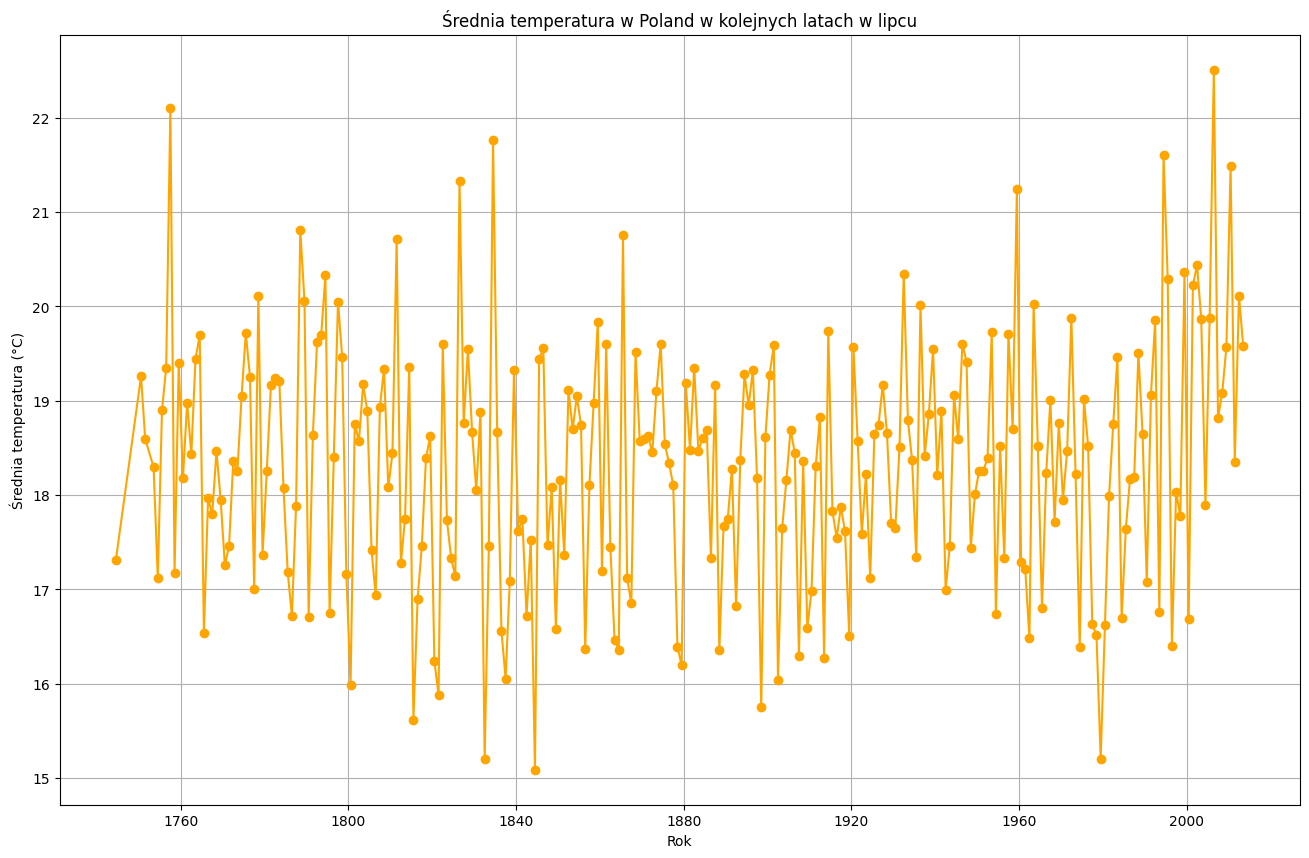

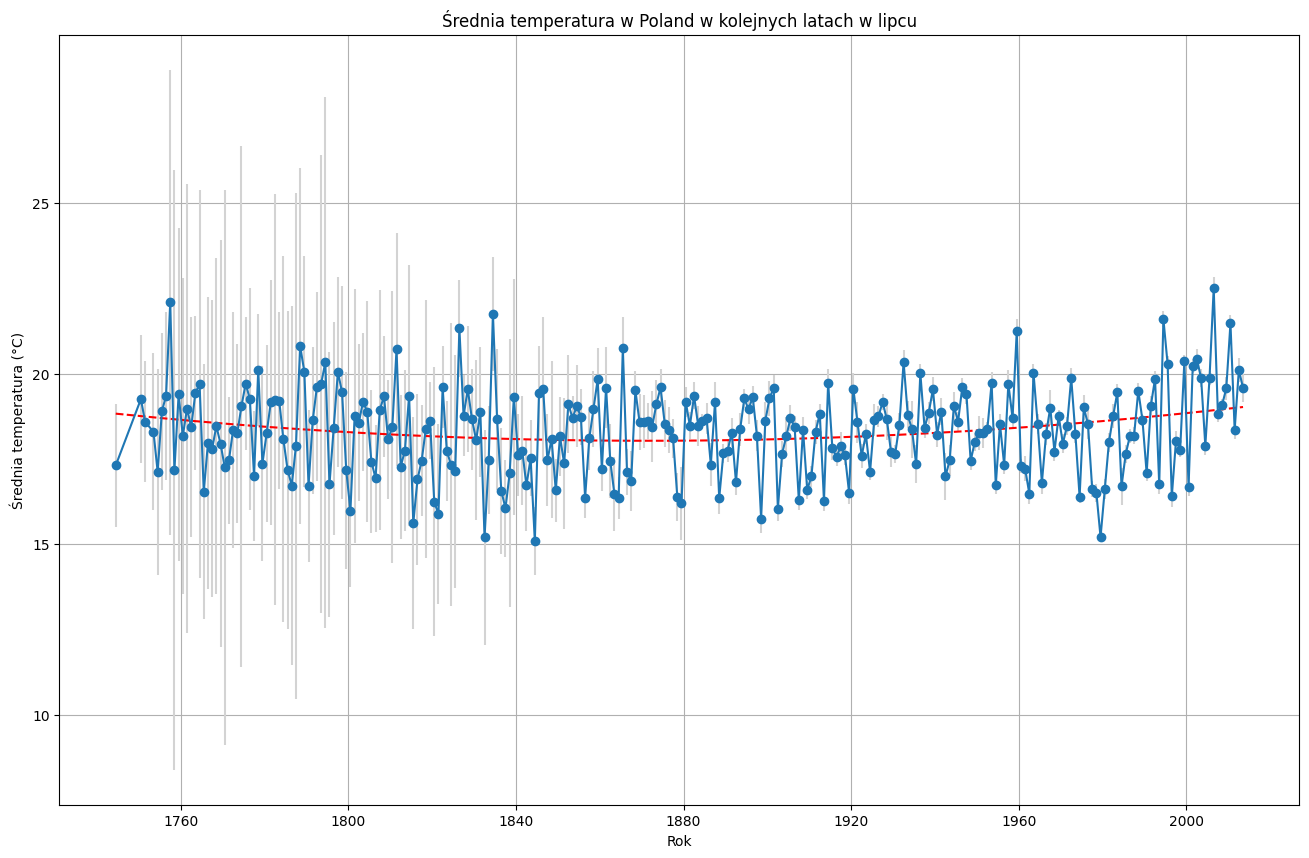

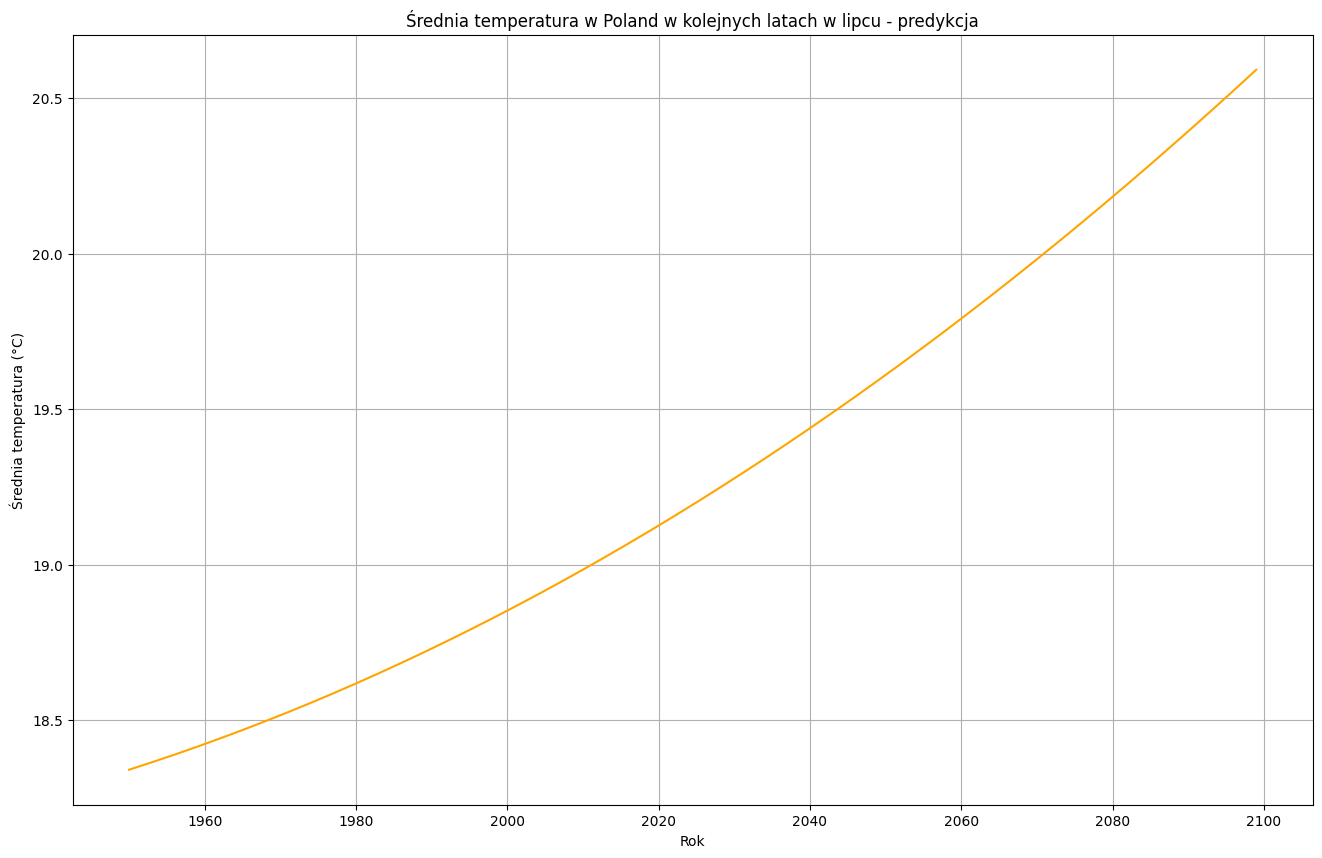

In [ ]:

try:
    data_temperature['dt'] = pd.to_datetime(data_temperature['dt'])
    month = int(input("Podaj miesiąc pomiarów (1 - 12): "))
    country_name = input("Podaj państwo dla którego chcesz uzyskać dane odnośnie temperatury: ")
    country_temperature = data_temperature[(data_temperature['dt'].dt.month == month) & (data_temperature['Country'] == country_name)]

    month_name = ['styczniu', 'lutym', 'marcu', 'kwietniu', 'maju', 'czerwcu', 'lipcu', 'sierpniu', 'wrześniu', 'październiku', 'listopadzie', 'grudniu']

    country_temperature['dt'] = pd.to_datetime(country_temperature['dt'])


    country_temperature['Year'] = country_temperature['dt'].dt.year

    
    trend_line_calculate = np.polyfit(country_temperature['Year'], country_temperature['AverageTemperature'], 2)
    trend_line_calcualte_fn = np.poly1d(trend_line_calculate)

    temperature_1850 = trend_line_calcualte_fn(1850)
    temperature_1900 = trend_line_calcualte_fn(1900)
    temperature_1950 = trend_line_calcualte_fn(1950)
    temperature_2000 = trend_line_calcualte_fn(2000)
    temperature_2024 = trend_line_calcualte_fn(2024)
    temperature_2050 = trend_line_calcualte_fn(2050)
    temperature_2100 = trend_line_calcualte_fn(2100)

    trend_line_draw = np.polyfit(country_temperature.index, country_temperature['AverageTemperature'], 2)
    trend_line_draw_fn = np.poly1d(trend_line_draw)

    predictions = pd.DataFrame({'Rok': [1850, 1900, 1950, 2000,2024, 2050, 2100],'Przewidywana temperatura (°C)': [temperature_1850, temperature_1900, temperature_1950, temperature_2000,temperature_2024, temperature_2050, temperature_2100]})
    print(predictions)

    future_trend = []
    for i in range(1950,2100):
        future_trend.append(trend_line_calcualte_fn(i))

    future_years=np.arange(1950,2100)

    plt.figure(figsize=(16, 10))
    plt.plot(country_temperature['dt'], country_temperature['AverageTemperature'], marker='o', linestyle='-',color='orange')
    plt.title('Średnia temperatura w ' + country_name + ' w kolejnych latach w ' + month_name[month-1])
    plt.xlabel('Rok')
    plt.ylabel('Średnia temperatura (°C)')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.errorbar(country_temperature['dt'], country_temperature['AverageTemperature'], yerr=country_temperature['AverageTemperatureUncertainty'], marker='o', linestyle='-', label='Średnia temperatura', ecolor='lightgray')
    plt.plot(country_temperature['dt'], trend_line_draw_fn(country_temperature.index), linestyle='--', color='red', label='Linia trendu')
    plt.title('Średnia temperatura w ' + country_name + ' w kolejnych latach w ' + month_name[month-1])
    plt.xlabel('Rok')
    plt.ylabel('Średnia temperatura (°C)')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.plot(future_years, future_trend, linestyle='-', color='orange', label='Linia trendu')
    plt.title('Średnia temperatura w ' + country_name + ' w kolejnych latach w ' + month_name[month-1] + ' - predykcja')
    plt.xlabel('Rok')
    plt.ylabel('Średnia temperatura (°C)')
    plt.grid(True)
    plt.show()

    
except:
    print("Wystąpił błąd. Upewnij się, że nazwa państwa (duża litera i angielska nazwa) oraz miesiąc (liczba 1 - 12) są poprawne.")


## **Stopień zalesienia danego państwa**

//OPIS DANYCH ITP.

Wczytanie danych:

In [ ]:
data_forest = pd.read_csv('dane/forest_percent_by_country.csv')
print(data_forest.head(10))

  country_code country_name  year  value
0          ABW        Aruba  1990   2.33
1          ABW        Aruba  1991   2.33
2          ABW        Aruba  1992   2.33
3          ABW        Aruba  1993   2.33
4          ABW        Aruba  1994   2.33
5          ABW        Aruba  1995   2.33
6          ABW        Aruba  1996   2.33
7          ABW        Aruba  1997   2.33
8          ABW        Aruba  1998   2.33
9          ABW        Aruba  1999   2.33


Znajdźmy 10 państw o największej powierzchni lasów i 10 państw o najmniejszej powierzchni lasów odpowiednio w 1990 i 2020. 

In [ ]:
top_10_1990 = data_forest[data_forest['year']==1990].nlargest(10,'value')
top_10_1990.head(10)


,country_code,country_name,year,value
6671,SUR,Suriname,1990,98.57
2706,GNQ,Equatorial Guinea,1990,96.23
2892,GUY,Guyana,1990,94.50
2458,GAB,Gabon,1990,92.22
1517,CSS,Caribbean small states,1990,91.39
6351,SLB,Solomon Islands,1990,90.92
341,ASM,American Samoa,1990,90.35
3977,LBR,Liberia,1990,88.51
5731,PNG,Papua New Guinea,1990,80.38
2675,GNB,Guinea-Bissau,1990,79.42


In [ ]:
top_10_2020 = data_forest[data_forest['year']==2020].nlargest(10,'value')
top_10_2020.head(10)

,country_code,country_name,year,value
6701,SUR,Suriname,2020,97.41
2922,GUY,Guyana,2020,93.55
2457,FSM,"Micronesia, Fed. Sts.",2020,92.03
2488,GAB,Gabon,2020,91.32
6381,SLB,Solomon Islands,2020,90.14
5730,PLW,Palau,2020,90.02
1547,CSS,Caribbean small states,2020,89.82
2736,GNQ,Equatorial Guinea,2020,87.29
371,ASM,American Samoa,2020,85.65
5761,PNG,Papua New Guinea,2020,79.18


In [ ]:
bottom_10_1990 = data_forest[data_forest['year']==1990].nsmallest(10,'value')
bottom_10_1990.head(10)


,country_code,country_name,year,value
2582,GIB,Gibraltar,1990,0.00
4494,MCO,Monaco,1990,0.00
5422,NRU,Nauru,1990,0.00
6072,QAT,Qatar,1990,0.00
2799,GRL,Greenland,1990,0.00
5515,OMN,Oman,1990,0.01
2056,EGY,"Egypt, Arab Rep.",1990,0.04
2397,FRO,Faroe Islands,1990,0.06
4008,LBY,Libya,1990,0.12
3450,ISL,Iceland,1990,0.17


In [ ]:
bottom_10_2020 = data_forest[data_forest['year']==2020].nsmallest(10,'value')
bottom_10_2020.head(10)

,country_code,country_name,year,value
2612,GIB,Gibraltar,2020,0.00
4524,MCO,Monaco,2020,0.00
5452,NRU,Nauru,2020,0.00
6102,QAT,Qatar,2020,0.00
2829,GRL,Greenland,2020,0.00
5545,OMN,Oman,2020,0.01
2086,EGY,"Egypt, Arab Rep.",2020,0.05
2427,FRO,Faroe Islands,2020,0.06
4038,LBY,Libya,2020,0.12
1590,CUW,Curacao,2020,0.16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


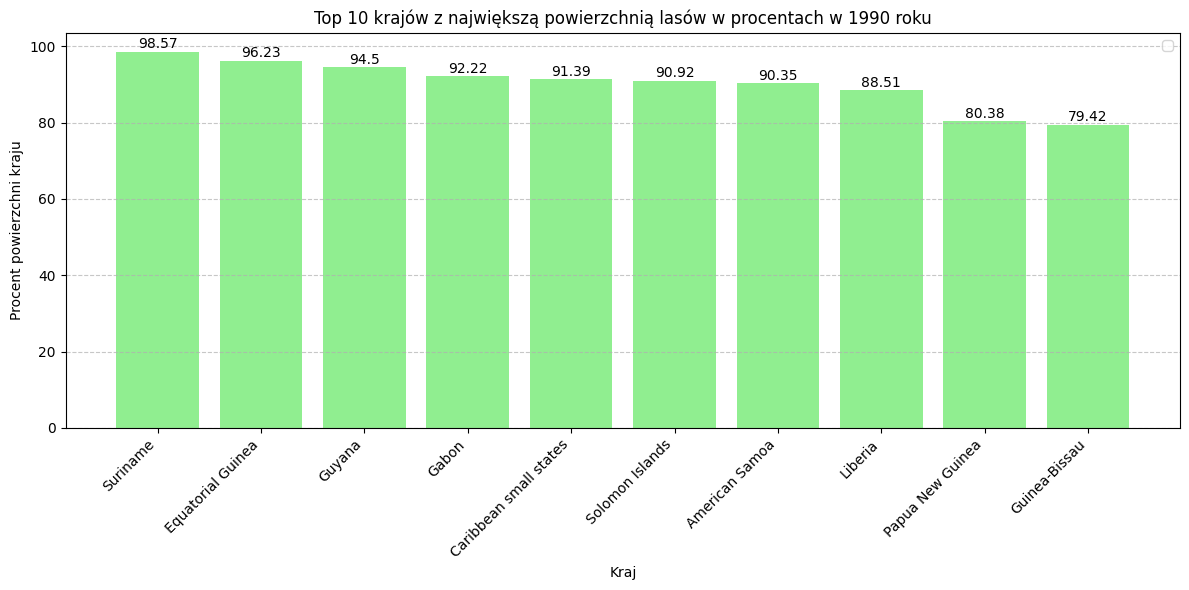

In [ ]:
plt.figure(figsize=(12, 6))

bars = plt.bar(top_10_1990['country_name'], top_10_1990['value'], color='lightgreen')
plt.title('Top 10 krajów z największą powierzchnią lasów w procentach w 1990 roku')
plt.xlabel('Kraj')
plt.ylabel('Procent powierzchni kraju')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


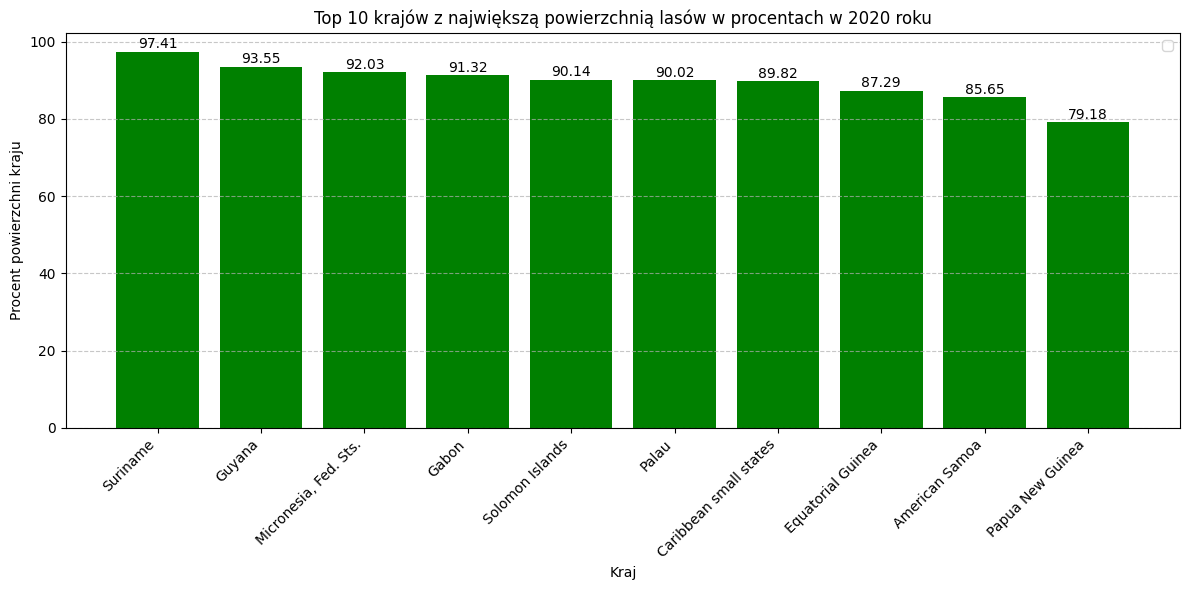

In [ ]:
plt.figure(figsize=(12, 6))

bars = plt.bar(top_10_2020['country_name'], top_10_2020['value'], color='green')
plt.title('Top 10 krajów z największą powierzchnią lasów w procentach w 2020 roku')
plt.xlabel('Kraj')
plt.ylabel('Procent powierzchni kraju')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


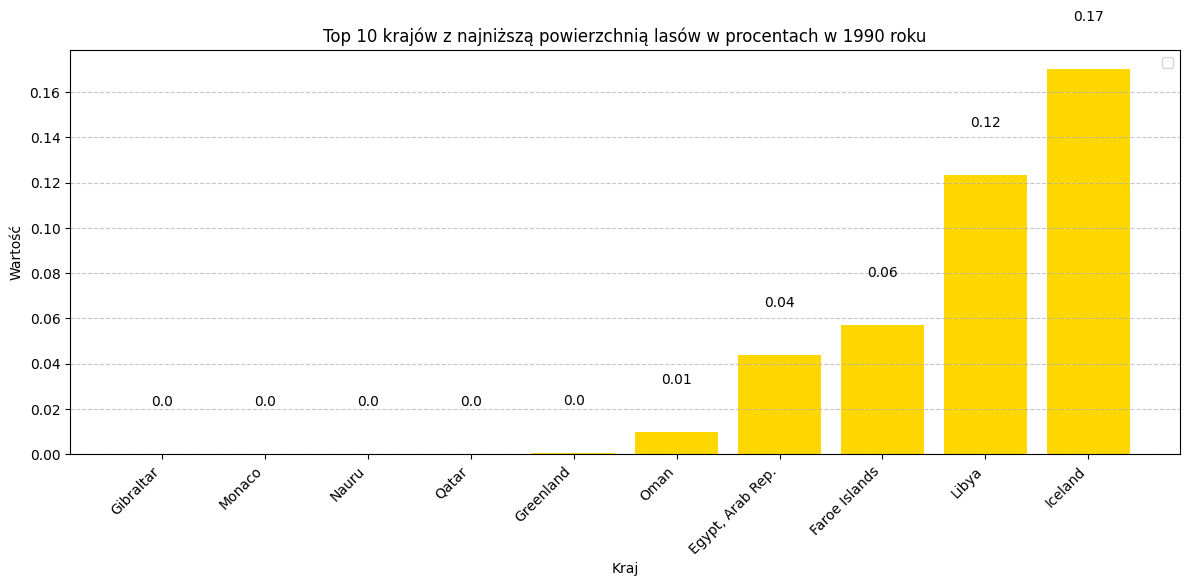

In [ ]:
plt.figure(figsize=(12, 6))

bars = plt.bar(bottom_10_1990['country_name'], bottom_10_1990['value'], color='gold')
plt.title('Top 10 krajów z najniższą powierzchnią lasów w procentach w 1990 roku')
plt.xlabel('Kraj')
plt.ylabel('Wartość')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


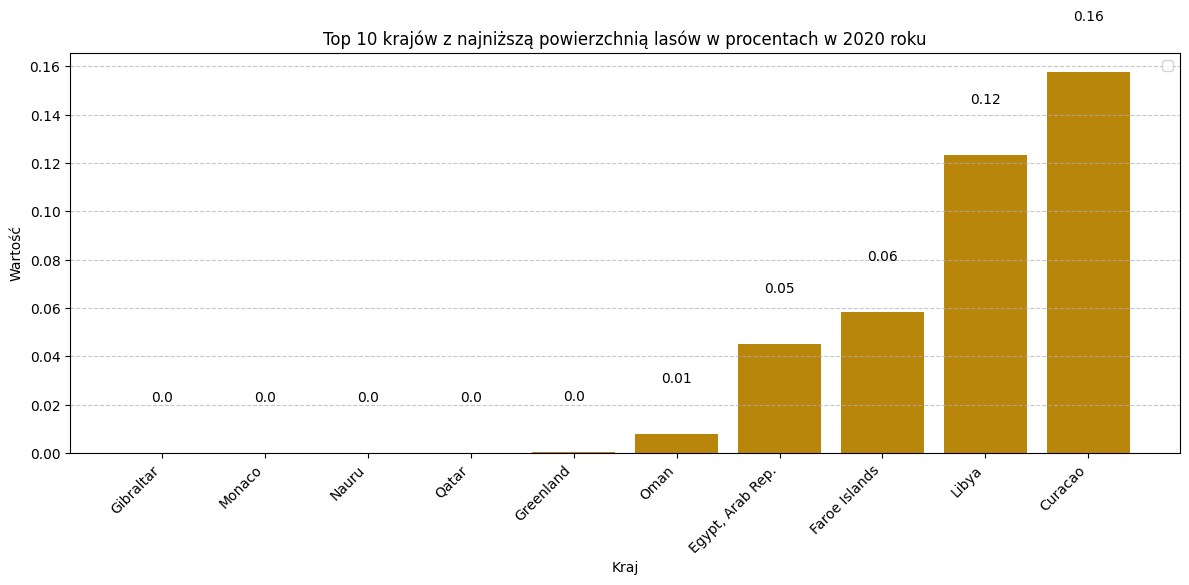

In [ ]:
plt.figure(figsize=(12, 6))

bars = plt.bar(bottom_10_2020['country_name'], bottom_10_2020['value'], color='darkgoldenrod')
plt.title('Top 10 krajów z najniższą powierzchnią lasów w procentach w 2020 roku')
plt.xlabel('Kraj')
plt.ylabel('Wartość')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  
plt.show()

Znajdźmy 10 państw, które w latach 1990 - 2020 straciły najwięcej powierzchni lasów i 10 państw, które najwięcej zyskały.

In [ ]:
grouped_data_forest = data_forest.groupby('country_name')

forest_loss = grouped_data_forest.apply(lambda x: x.iloc[0]['value'] - x.iloc[-1]['value'])
forest_gain = grouped_data_forest.apply(lambda x: x.iloc[0]['value'] - x.iloc[-1]['value'])

top_10_forest_loss = forest_loss.nlargest(10)
top_10_forest_gain = forest_gain.nsmallest(10)

print("10 państw z największym ubytkiem lasów w latach 1990-2020:\n")
print(top_10_forest_loss.head(10))

print('\n')

print("10 państw z największym zyskiem lasów w latach 1990-2020:\n")
print(top_10_forest_gain)

10 państw z największym ubytkiem lasów w latach 1990-2020:

country_name
Nicaragua                  24.86
Paraguay                   23.77
Northern Mariana Islands   19.75
Gambia, The                17.00
Cambodia                   16.64
Indonesia                  16.37
Myanmar                    16.28
Cote d'Ivoire              15.77
Benin                      15.08
Belize                     14.16
dtype: float64


10 państw z największym zyskiem lasów w latach 1990-2020:

country_name
Puerto Rico          -19.84
Vietnam              -17.91
Bhutan               -17.80
Montenegro           -14.94
Cuba                 -12.07
Dominican Republic   -11.37
Fiji                 -10.96
Spain                 -9.34
Cabo Verde            -7.53
Guam                  -7.41
dtype: float64


C:\Users\kubar\AppData\Local\Temp\ipykernel_3032\1583027202.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  forest_loss = grouped_data_forest.apply(lambda x: x.iloc[0]['value'] - x.iloc[-1]['value'])
C:\Users\kubar\AppData\Local\Temp\ipykernel_3032\1583027202.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  forest_gain = grouped_data_forest.apply(lambda x: x.iloc[0]['value'] - x.iloc[-1]['value'])


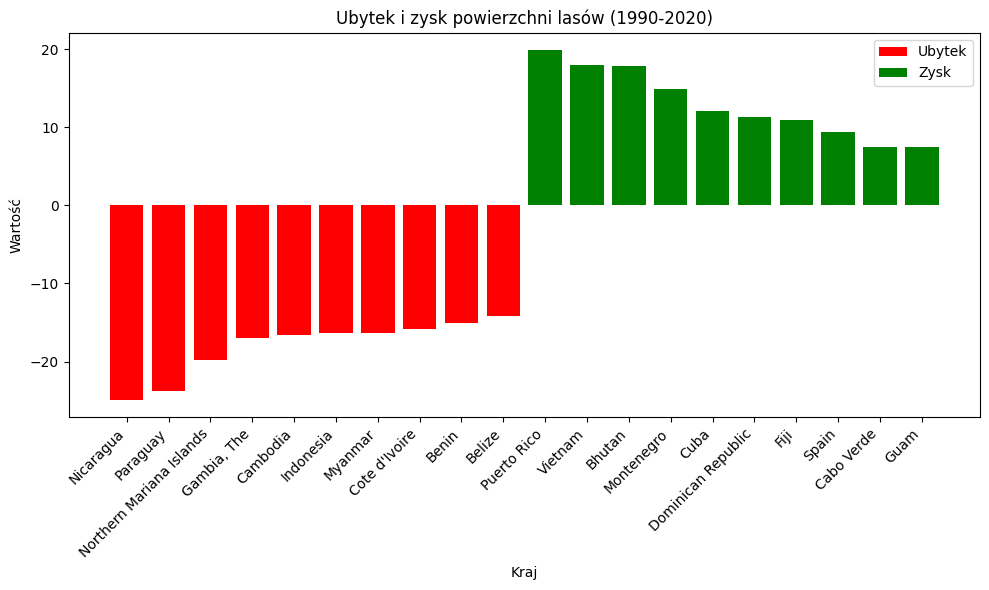

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(top_10_forest_loss.index, top_10_forest_loss.values*-1, color='red', label='Ubytek')

plt.bar(top_10_forest_gain.index, top_10_forest_gain.values*-1, color='green', label='Zysk')

plt.title('Ubytek i zysk powierzchni lasów (1990-2020)')
plt.xlabel('Kraj')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')  

plt.legend()

plt.tight_layout()  
plt.show()

Procent zalesienia całego świata w roku 1990 i 2016 - porównanie

In [ ]:
world_forest = data_forest[data_forest['country_name']=='World']
#world_forest.head(1)
world_forest_1990 = world_forest.nsmallest(1,'year')
world_forest_2016 = world_forest.nlargest(1,'year')
print(world_forest_1990)
print(world_forest_2016)

     country_code country_name  year  value
7861          WLD        World  1990  31.62
     country_code country_name  year  value
7887          WLD        World  2016  30.72


Procent powierzchni lądów zalesionych na przestrzeni lat 1990 - 2020 dla **całego świata**

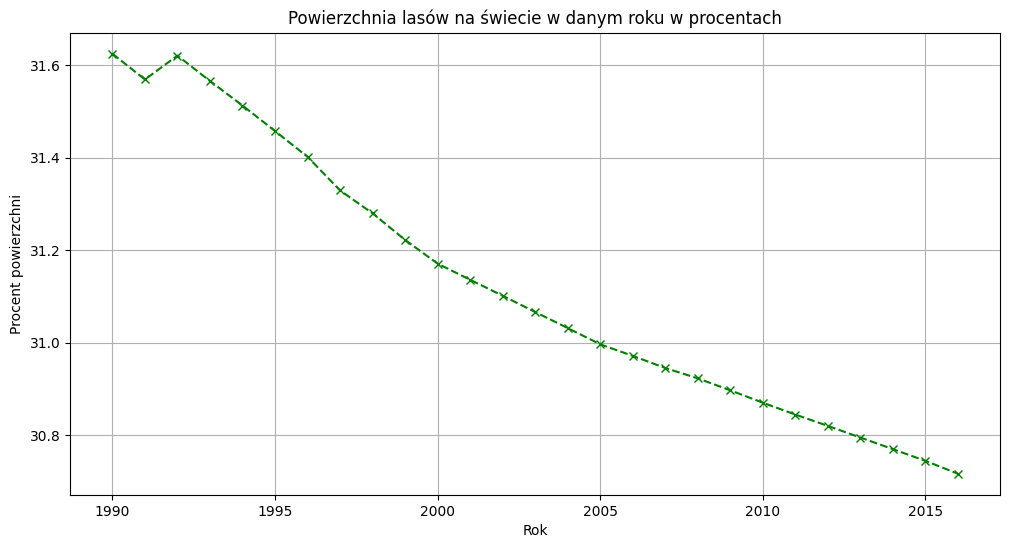

In [ ]:

world_forest_all_years = data_forest[data_forest['country_name'] == 'World']

world_forest_all_years = world_forest_all_years.sort_values(by='year')

plt.figure(figsize=(12, 6))
plt.plot(world_forest_all_years['year'], world_forest_all_years['value'], marker='x', linestyle='--', color='green')
plt.xlabel('Rok')
plt.ylabel('Procent powierzchni')
plt.title('Powierzchnia lasów na świecie w danym roku w procentach')
plt.grid(True) 
plt.show()


Prognozy uzyskane za pomocą **regresji liniowej**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


    Rok  Powierzchnia lasów (%)
0  2024                   30.36
1  2050                   29.40
2  2075                   28.49
3  2100                   27.57


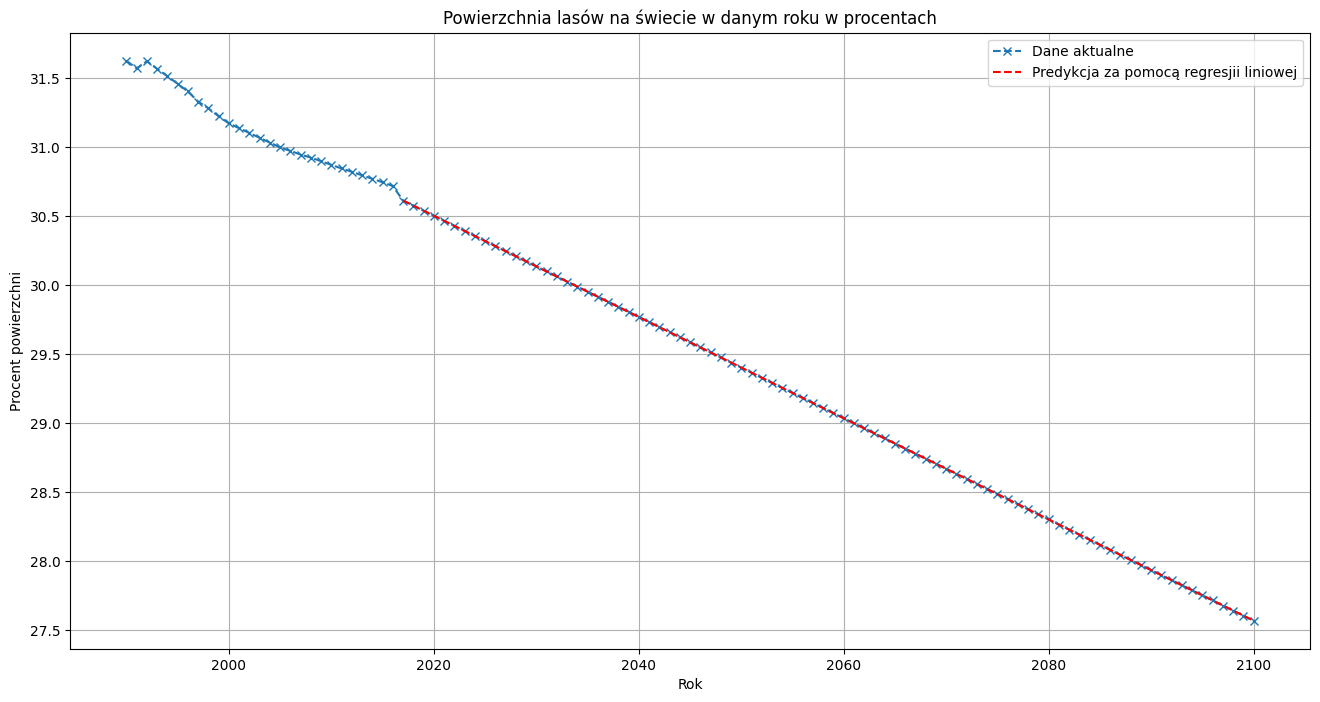

In [ ]:
years_after_2016 = np.arange(2017, 2101).reshape(-1, 1)
linear_regression = LinearRegression()
linear_regression.fit(world_forest_all_years[['year']], world_forest_all_years['value'])
predicted_forest_coverages = linear_regression.predict(years_after_2016)

extended_years = np.concatenate((world_forest_all_years['year'].values, years_after_2016.flatten()))
extended_forest_coverages = np.concatenate((world_forest_all_years['value'].values, predicted_forest_coverages))

years_to_predict = [2024, 2050, 2075, 2100]
predicted_coverages = linear_regression.predict(np.array(years_to_predict).reshape(-1, 1))

predictions_df = pd.DataFrame({'Rok': years_to_predict, 'Powierzchnia lasów (%)': predicted_coverages})
print(predictions_df)

plt.figure(figsize=(16, 8))
plt.plot(extended_years, extended_forest_coverages, marker='x', linestyle='--', label='Dane aktualne')
plt.xlabel('Rok')
plt.ylabel('Procent powierzchni')
plt.title('Powierzchnia lasów na świecie w danym roku w procentach')
plt.grid(True)


plt.plot(years_after_2016, predicted_forest_coverages, linestyle='--', color='red', label='Predykcja za pomocą regresjii liniowej')

plt.legend()
plt.show()

Powierzchnia lasów dla **wybranego państwa** w procentach i jej prognozy do roku 2100 za pomocą **regresjii liniowej**.

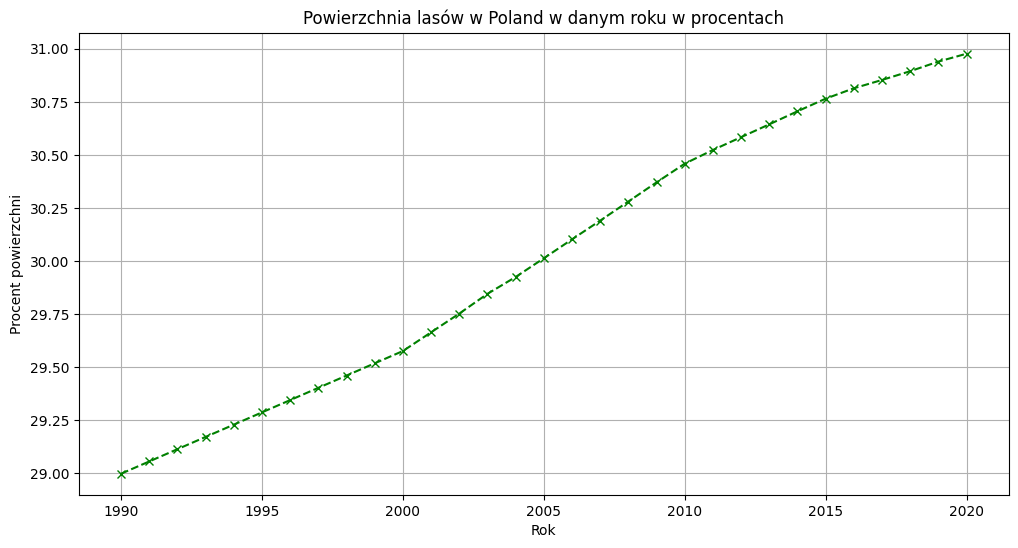

    Rok  Powierzchnia lasów (%)
0  2024                   31.37
1  2050                   33.23
2  2075                   35.02
3  2100                   36.81


C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


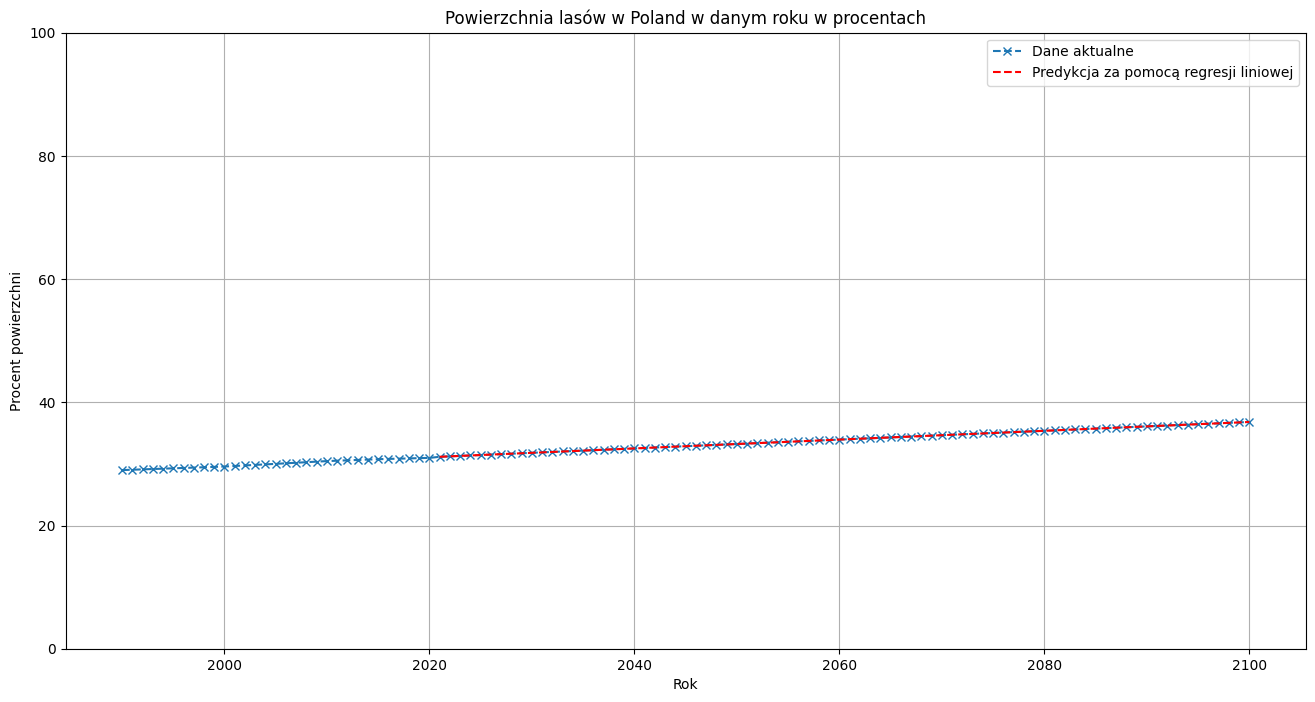

In [ ]:
try:
    country_name = input("Podaj nazwę państwa (angielska nazwa, z wielkiej litery):")
    country_forest_all_years = data_forest[data_forest['country_name'] == country_name]

    country_forest_all_years = country_forest_all_years.sort_values(by='year')

    plt.figure(figsize=(12, 6))
    plt.plot(country_forest_all_years['year'], country_forest_all_years['value'], marker='x', linestyle='--', color='green')
    plt.xlabel('Rok')
    plt.ylabel('Procent powierzchni')
    plt.title('Powierzchnia lasów w '+ country_name +' w danym roku w procentach')
    plt.grid(True) 
    plt.show()

    years_after_2020 = np.arange(2021, 2101).reshape(-1, 1)
    linear_regression = LinearRegression()
    linear_regression.fit(country_forest_all_years[['year']], country_forest_all_years['value'])
    predicted_forest_coverages = linear_regression.predict(years_after_2020)

    extended_years = np.concatenate((country_forest_all_years['year'].values, years_after_2020.flatten()))
    extended_forest_coverages = np.concatenate((country_forest_all_years['value'].values, predicted_forest_coverages))

    years_to_predict = [2024, 2050, 2075, 2100]
    predicted_coverages = linear_regression.predict(np.array(years_to_predict).reshape(-1, 1))
    predicted_coverages = np.where(predicted_coverages < 0, 0, predicted_coverages)
    predicted_coverages = np.where(predicted_coverages > 100, 100, predicted_coverages)

    predictions_df = pd.DataFrame({'Rok': years_to_predict, 'Powierzchnia lasów (%)': predicted_coverages})
    print(predictions_df)

    plt.figure(figsize=(16, 8))
    plt.plot(extended_years, extended_forest_coverages, marker='x', linestyle='--', label='Dane aktualne')
    plt.xlabel('Rok')
    plt.ylabel('Procent powierzchni')
    plt.ylim(0,100)
    plt.title('Powierzchnia lasów w '+ country_name +' w danym roku w procentach')
    plt.grid(True)


    plt.plot(years_after_2020, predicted_forest_coverages, linestyle='--', color='red', label='Predykcja za pomocą regresji liniowej')

    plt.legend()
    plt.show()
except:
    print("Wystąpił błąd. Upewnij się, że nazwa państwa (duża litera i angielska nazwa) jest poprawna")

## **Katastrofy naturalne w latach 1900 - 2021**

Analizowany w tym podpunkcie plik CSV zawiera dane dotyczące klęsk żywiołowych z różnych regionów i krajów w latach 1900-2021. Oto opis poszczególnych kolumn:

Year: Rok, w którym wystąpiła klęska.

Seq: Numer sekwencyjny.

Glide: Kod zdarzenia z Global Disaster Identifier (Glide).

Disaster Group: Grupa klęski, tutaj głównie naturalne.

Disaster Subgroup: Podgrupa klęski, np. klimatyczne, geofizyczne.

Disaster Type: Rodzaj klęski, np. susza, trzęsienie ziemi.

Disaster Subtype: Podtyp klęski, np. powódź rzeczna, pożar lasu.

Disaster Subsubtype: Podpodtyp klęski, szczegółowa kategoria klęski.

Event Name: Nazwa zdarzenia klęski.

Country: Kraj, w którym wystąpiła klęska.

ISO: Kod ISO kraju.

Region: Region geograficzny, do którego należy kraj.

Continent: Kontynent, na którym znajduje się kraj.

Location: Szczegółowa lokalizacja klęski.

Origin: Pochodzenie klęski.

Associated Dis: Powiązane klęski.

Associated Dis2: Druga powiązana klęska.

OFDA Response: Odpowiedź Urzędu ds. Pomocy Zagranicznej (OFDA).

Appeal: Apel o pomoc.

Declaration: Deklaracja o klęsce.

Aid Contribution: Wkład w pomoc.

Dis Mag Value: Wartość magnitudy klęski.

Dis Mag Scale: Skala magnitudy klęski.

Latitude: Szerokość geograficzna.

Longitude: Długość geograficzna.

Local Time: Lokalny czas.

River Basin: Obszar dorzecza rzeki.

Start Year: Rok rozpoczęcia klęski.

Start Month: Miesiąc rozpoczęcia klęski.

Start Day: Dzień rozpoczęcia klęski.

End Year: Rok zakończenia klęski.

End Month: Miesiąc zakończenia klęski.

End Day: Dzień zakończenia klęski.

Total Deaths: Całkowita liczba ofiar śmiertelnych.

No Injured: Liczba rannych.

No Affected: Liczba dotkniętych klęską.

No Homeless: Liczba bezdomnych.

Total Affected: Całkowicie dotknięci klęską.

Insured Damages ('000 US$): Szacowane ubezpieczone szkody w tysiącach dolarów amerykańskich.

Total Damages ('000 US$): Całkowite szkody w tysiącach dolarów amerykańskich.

CPI: Indeks cen towarów i usług.

Adm Level: Poziom administracyjny.

Admin1 Code: Kod administracyjny regionu/prowincji.

Admin2 Code: Kod administracyjny podregionu.

Geo Locations: Lokalizacje geograficzne.

Ten zbiór danych zawiera informacje o różnych rodzajach klęsk żywiołowych, takich jak susze, trzęsienia ziemi, powodzie czy erupcje wulkanów, wraz z danymi geograficznymi i skutkami tych klęsk. Może być wykorzystywany do analizy trendów w występowaniu klęsk naturalnych oraz ich wpływu na społeczeństwo i gospodarkę.

Wczytanie danych:

In [ ]:
disasters_data = pd.read_csv("dane/1900_2021_DISASTERS.xlsx - emdat data.csv")
disasters_data.head(10)

#data_check = disasters_data.loc[disasters_data['Disaster Group']=='Natural']
#data_check.head(100)

#unikalne_wartosci = disasters_data['Origin'].unique()
#print(unikalne_wartosci)

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
5,1903,6,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,...,NaN,NaN,23.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
6,1903,12,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mount Karthala,Comoros (the),...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
7,1904,3,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
8,1905,5,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,...,NaN,NaN,18.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
9,1905,3,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,India,...,NaN,NaN,NaN,NaN,25000.0,3.479379,NaN,NaN,NaN,NaN


Do analizy danych dokonam selekcji odpowiednich kolumn: rok, rodzaj klęski, podtyp klęski, podtyp podtypu klęski, nazwa zdarzenia, kraj, kontynent, pochodzenie, liczba ofiar śmiertelnych, liczba osób dotkniętych klęską, szkody w tysiącach dolarów amerykańskich.

In [ ]:
selected_disaster_data = disasters_data[['Year', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 
                  'Event Name', 'Country', 'Continent', 'Origin', 'Total Deaths', 
                  'Total Affected', 'Total Damages (\'000 US$)']]

selected_disaster_data.head(10)

,Year,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,Continent,Origin,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1900,Drought,Drought,NaN,NaN,Cabo Verde,Africa,NaN,11000.0,NaN,NaN
1,1900,Drought,Drought,NaN,NaN,India,Asia,NaN,1250000.0,NaN,NaN
2,1902,Earthquake,Ground movement,NaN,NaN,Guatemala,Americas,NaN,2000.0,NaN,25000.0
3,1902,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,Americas,NaN,1000.0,NaN,NaN
4,1902,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,Americas,NaN,6000.0,NaN,NaN
5,1903,Mass movement (dry),Rockfall,NaN,NaN,Canada,Americas,NaN,76.0,23.0,NaN
6,1903,Volcanic activity,Ash fall,NaN,Mount Karthala,Comoros (the),Africa,NaN,17.0,NaN,NaN
7,1904,Storm,Tropical cyclone,NaN,NaN,Bangladesh,Asia,NaN,NaN,NaN,NaN
8,1905,Mass movement (dry),Rockfall,NaN,NaN,Canada,Americas,NaN,18.0,18.0,NaN
9,1905,Earthquake,Ground movement,NaN,NaN,India,Asia,NaN,20000.0,NaN,25000.0


Pogrupujmy poszczególne klęski wg. roku, aby utworzyć wykres słupkowy, z którego będzie można odczytać liczbę klęsk w poszczególnych latach.

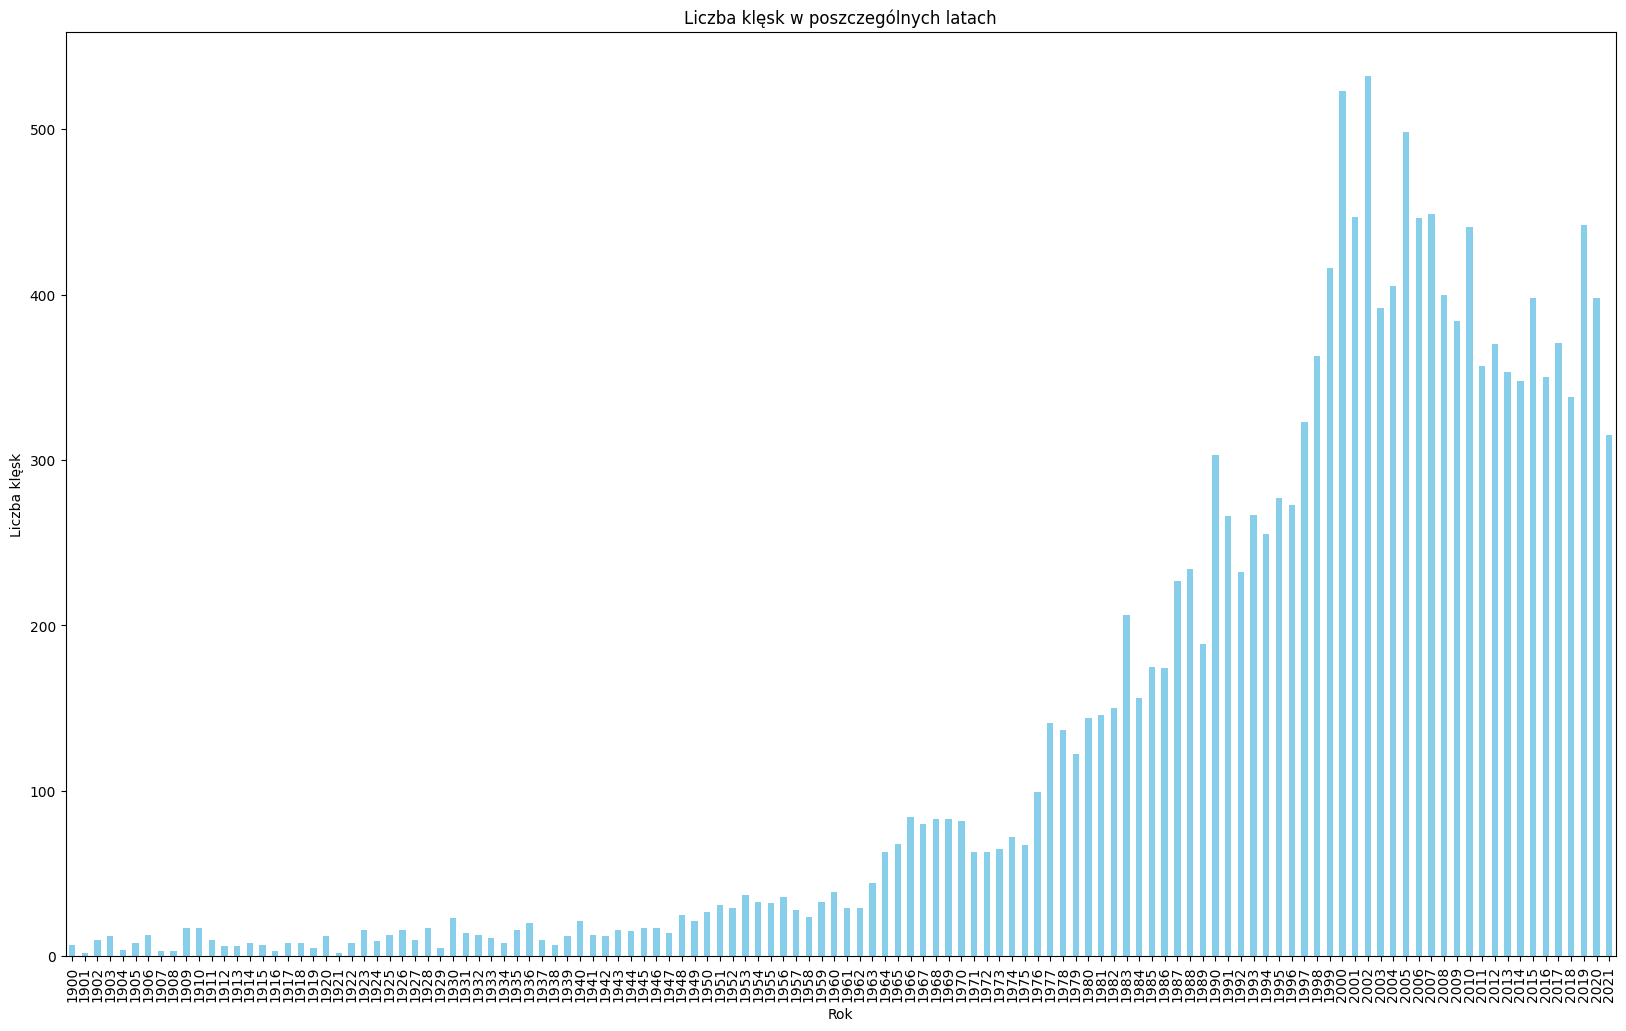

In [ ]:
disasters_years = selected_disaster_data.groupby('Year').size()

disasters_years.plot(kind='bar', figsize=(20, 12), color='skyblue')

plt.title('Liczba klęsk w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba klęsk')

plt.show()

Sprawdźmy top 10 największych klęsk wg. ofiar śmiertelnych i według strat wyrażonych w dolarach amerykańskich.

In [ ]:

top_10_disaster_death = selected_disaster_data.nlargest(10, 'Total Deaths')

top_loss = selected_disaster_data.nlargest(10, 'Total Damages (\'000 US$)')

print("Top 10 klęsk według liczby ofiar śmiertelnych:")


display(top_10_disaster_death[['Year', 'Disaster Type', 
                         'Country', 'Continent',  'Total Deaths', 
                             'Total Affected', 'Total Damages (\'000 US$)']])

print("\nTop 10 klęsk według strat w dolarach amerykańskich:")
display(top_loss[['Year', 'Disaster Type', 
                   'Country', 'Continent',  'Total Deaths', 
                  'Total Affected', 'Total Damages (\'000 US$)']])

Top 10 klęsk według liczby ofiar śmiertelnych:


,Year,Disaster Type,Country,Continent,Total Deaths,Total Affected,Total Damages ('000 US$)
111,1931,Flood,China,Asia,3700000.0,NaN,1400000.0
97,1928,Drought,China,Asia,3000000.0,NaN,NaN
902,1917,Epidemic,Soviet Union,Europe,2500000.0,NaN,NaN
58,1920,Epidemic,India,Asia,2000000.0,NaN,NaN
276,1959,Flood,China,Asia,2000000.0,NaN,NaN
152,1943,Drought,Bangladesh,Asia,1900000.0,NaN,NaN
20,1909,Epidemic,China,Asia,1500000.0,NaN,NaN
145,1942,Drought,India,Asia,1500000.0,NaN,NaN
1355,1965,Drought,India,Asia,1500000.0,100000000.0,100000.0
16,1907,Epidemic,India,Asia,1300000.0,NaN,NaN



Top 10 klęsk według strat w dolarach amerykańskich:


,Year,Disaster Type,Country,Continent,Total Deaths,Total Affected,Total Damages ('000 US$)
11933,2011,Earthquake,Japan,Asia,19846.0,368820.0,210000000.0
9844,2005,Storm,United States of America (the),Americas,1833.0,500000.0,125000000.0
5530,1995,Earthquake,Japan,Asia,5297.0,541636.0,100000000.0
14871,2017,Storm,United States of America (the),Americas,88.0,582024.0,95000000.0
10490,2008,Earthquake,China,Asia,87476.0,45976596.0,85000000.0
14353,2017,Storm,Puerto Rico,Americas,64.0,750000.0,68000000.0
14894,2017,Storm,United States of America (the),Americas,97.0,70000.0,57000000.0
12923,2012,Storm,United States of America (the),Americas,54.0,NaN,50000000.0
11943,2011,Flood,Thailand,Asia,813.0,9500000.0,40000000.0
5102,1994,Earthquake,United States of America (the),Americas,60.0,27000.0,30000000.0


## **Zbiór danych klimatycznych w Jena**

In [ ]:
jena_dataset = pd.read_csv("dane/jena_climate_2009_2016.csv")
jena_dataset.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30


## **Zbiór danych dotyczący zmian klimatu**

In [ ]:
climate_change_data = pd.read_csv("dane/climate_change_data.csv")
climate_change_data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.69,403.12,0.72,13.84,23.63,18.49
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.81,396.66,1.21,40.97,43.98,34.25
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.32,451.55,-0.16,42.70,96.65,34.12
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.31,422.40,-0.48,5.19,47.47,8.55
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.21,410.47,1.14,78.70,61.79,8.00


//Analiza danych zestawionych, można by spojrzeć na korlacje między np. emisją CO2 a zaesieniem lub temperaturą itp.
